In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv("C:/Users/hp/Downloads/lazada/TonerScrape.csv")
df

,web-scraper-order,web-scraper-start-url,linkproduk,linkproduk-href,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,1725507339-1,https://www.lazada.co.id/beli-toner/,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,Rp33.000,4.0K Terjual,(768),NaN,Kota Jakarta Barat
1,1725507339-2,https://www.lazada.co.id/beli-toner/,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,Rp21.000,2.5K Terjual,(1074),Diskon koin Rp210,Kab. Bogor
2,1725507339-3,https://www.lazada.co.id/beli-toner/,Toner Af Dwoble Glow,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,Rp45.000,186 Terjual,(44),NaN,Kota Makassar
3,1725507339-4,https://www.lazada.co.id/beli-toner/,Viva Air Mawar Original Bpom - Best Value Product,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,Rp6.500,3.6K Terjual,(731),NaN,Kab. Bekasi
4,1725507339-5,https://www.lazada.co.id/beli-toner/,"TONER COLLAGEN 701 Glowing, TONER Colagen",https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",Rp12.000,297 Terjual,(47),Diskon koin Rp600,Kota Jakarta Barat
...,...,...,...,...,...,...,...,...,...,...
8195,1725507339-8196,https://www.lazada.co.id/beli-toner/,NJA SINATA BEAUTY PAKET AGING GOLD PLUS SERUM ...,https://www.lazada.co.id/products/nja-sinata-b...,NJA SINATA BEAUTY PAKET AGING GOLD PLUS SERUM ...,Rp80.000,NaN,NaN,Hemat 19% dengan voucher,Kab. Bogor
8196,1725507339-8197,https://www.lazada.co.id/beli-toner/,Toner Acne Skincare UC Beauty BPOM dan Halal,https://www.lazada.co.id/products/toner-acne-s...,Toner Acne Skincare UC Beauty BPOM dan Halal,Rp15.000,12 Terjual,(1),Hemat 70% dengan voucher,Kab. Tangerang
8197,1725507339-8198,https://www.lazada.co.id/beli-toner/,LIFTHENG Hyaluronic Acid Saccharomyce Spray,https://www.lazada.co.id/products/liftheng-hya...,LIFTHENG Hyaluronic Acid Saccharomyce Spray,Rp12.700,30 Terjual,(11),Diskon koin Rp381,Kota Jakarta Barat
8198,1725507339-8199,https://www.lazada.co.id/beli-toner/,BODY TONER CENTELLA ASIATICA | BODY TONER KOMB...,https://www.lazada.co.id/products/body-toner-c...,BODY TONER CENTELLA ASIATICA | BODY TONER KOMB...,Rp15.500,45 Terjual,(5),Diskon koin Rp775,Kota Surabaya


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8200 entries, 0 to 8199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      8200 non-null   object
 1   web-scraper-start-url  8200 non-null   object
 2   linkproduk             8200 non-null   object
 3   linkproduk-href        8200 non-null   object
 4   namaproduk             8200 non-null   object
 5   harga                  8200 non-null   object
 6   produkterjual          7340 non-null   object
 7   jumlahpenilaian        7641 non-null   object
 8   promo                  6545 non-null   object
 9   daerah                 8200 non-null   object
dtypes: object(10)
memory usage: 640.8+ KB


## Pre Processing

In [6]:
df.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'linkproduk'], inplace=True)
df.rename(columns={'linkproduk-href': 'linkproduk'}, inplace=True)
df.head(3)

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,Rp33.000,4.0K Terjual,(768),NaN,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,Rp21.000,2.5K Terjual,(1074),Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,Rp45.000,186 Terjual,(44),NaN,Kota Makassar


* Konversi Format Penjualan dari Teks ke Numerik

In [7]:
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.upper()
        # Menghapus teks tambahan sebelum konversi
        value = ''.join(filter(lambda x: x.isdigit() or x in ['K','.'], value))
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '').strip()) * 1000
        else:
            return float(value.replace(',', '').strip())
    return value
    
df['produkterjual'] = df['produkterjual'].apply(convert_to_numeric)
df.head(3)

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,Rp33.000,4000.0,(768),NaN,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,Rp21.000,2500.0,(1074),Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,Rp45.000,186.0,(44),NaN,Kota Makassar


* Pembersihan dan Konversi Data Harga

In [8]:
df['harga'] = df['harga'].str.replace('Rp', '').str.replace('.', '').astype(int)
df.head()

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000.0,(768),NaN,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500.0,(1074),Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186.0,(44),NaN,Kota Makassar
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600.0,(731),NaN,Kab. Bekasi
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297.0,(47),Diskon koin Rp600,Kota Jakarta Barat


* Menghapus tanda kurung dan mengubah tipe df menjadi integer

In [9]:
df['jumlahpenilaian'] = df['jumlahpenilaian'].str.replace('[()]', '', regex=True)
df.head(3)

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000.0,768,NaN,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500.0,1074,Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186.0,44,NaN,Kota Makassar


* Penanganan Nilai Hilang dalam Data

In [10]:
df['produkterjual'] = df['produkterjual'].fillna(0)
df['jumlahpenilaian'] = df['jumlahpenilaian'].fillna(0)
df['promo'] = df['promo'].fillna('Tidak ada promo')
df.head(3)

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000.0,768,Tidak ada promo,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500.0,1074,Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186.0,44,Tidak ada promo,Kota Makassar


* Konversi Tipe Data Kolom ke Integer

In [11]:
df['produkterjual'] = df['produkterjual'].astype(int)
df['jumlahpenilaian'] = df['jumlahpenilaian'].astype(int)
df.head(3)

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak ada promo,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak ada promo,Kota Makassar


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8200 entries, 0 to 8199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   linkproduk       8200 non-null   object
 1   namaproduk       8200 non-null   object
 2   harga            8200 non-null   int32 
 3   produkterjual    8200 non-null   int32 
 4   jumlahpenilaian  8200 non-null   int32 
 5   promo            8200 non-null   object
 6   daerah           8200 non-null   object
dtypes: int32(3), object(4)
memory usage: 352.5+ KB


* Menangani Duplikasi Data

In [13]:
df.duplicated().sum()

4120

In [14]:
df = df.drop_duplicates(subset=['namaproduk'])
df

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak ada promo,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Diskon koin Rp210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak ada promo,Kota Makassar
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak ada promo,Kab. Bekasi
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Diskon koin Rp600,Kota Jakarta Barat
...,...,...,...,...,...,...,...
8155,https://www.lazada.co.id/products/nja-sinata-b...,NJA SINATA BEAUTY PAKET AGING GOLD PLUS SERUM ...,80000,0,0,Hemat 19% dengan voucher,Kab. Bogor
8156,https://www.lazada.co.id/products/toner-acne-s...,Toner Acne Skincare UC Beauty BPOM dan Halal,15000,12,1,Hemat 70% dengan voucher,Kab. Tangerang
8157,https://www.lazada.co.id/products/liftheng-hya...,LIFTHENG Hyaluronic Acid Saccharomyce Spray,12700,30,11,Diskon koin Rp381,Kota Jakarta Barat
8158,https://www.lazada.co.id/products/body-toner-c...,BODY TONER CENTELLA ASIATICA | BODY TONER KOMB...,15500,45,5,Diskon koin Rp775,Kota Surabaya


In [15]:
df['promo'] = df['promo'].str.replace('Rp', '').str.replace('.', '').astype(str)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\2668036095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['promo'] = df['promo'].str.replace('Rp', '').str.replace('.', '').astype(str)


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak ada promo,Kota Jakarta Barat
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Diskon koin 210,Kab. Bogor
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak ada promo,Kota Makassar
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak ada promo,Kab. Bekasi
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Diskon koin 600,Kota Jakarta Barat


In [16]:
# Fungsi untuk membersihkan promo
def clean_promo(promo):
    if isinstance(promo, str):  # Memastikan promo adalah string
        if 'Hemat' in promo and 'voucher' in promo:
            # Mengubah format promo dengan voucher XX%
            try:
                percentage = promo.split('Hemat ')[1].split(' dengan voucher')[0].strip()
                return f'Voucher {percentage}'
            except IndexError:
                return 'Voucher tidak diketahui'
        elif 'Diskon koin' in promo:
            # Mengubah format promo dengan koin XX
            try:
                amount = promo.split('Diskon koin ')[1].replace('Rp', '').strip()  # Menghapus 'Rp'
                return f'Koin {amount}'
            except IndexError:
                return 'Koin tidak diketahui'
    return 'Tidak Ada'  # Mengembalikan 'Tidak Ada' untuk non-string atau NaN

# Menerapkan fungsi ke kolom 'promo'
df['promo'] = df['promo'].apply(clean_promo)
df[['namaproduk', 'promo']]

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3329891576.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['promo'] = df['promo'].apply(clean_promo)


,namaproduk,promo
0,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,Tidak Ada
1,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,Koin 210
2,Toner Af Dwoble Glow,Tidak Ada
3,Viva Air Mawar Original Bpom - Best Value Product,Tidak Ada
4,"TONER COLLAGEN 701 Glowing, TONER Colagen",Koin 600
...,...,...
8155,NJA SINATA BEAUTY PAKET AGING GOLD PLUS SERUM ...,Voucher 19%
8156,Toner Acne Skincare UC Beauty BPOM dan Halal,Voucher 70%
8157,LIFTHENG Hyaluronic Acid Saccharomyce Spray,Koin 381
8158,BODY TONER CENTELLA ASIATICA | BODY TONER KOMB...,Koin 775


In [17]:
df.describe()

,harga,produkterjual,jumlahpenilaian
count,3.883000e+03,3883.000000,3883.00000
mean,4.650915e+04,714.786248,149.98017
std,1.800253e+05,6048.536695,1043.37376
min,1.000000e+03,0.000000,0.00000
25%,1.500000e+04,17.000000,5.00000
50%,2.860000e+04,55.000000,16.00000
75%,5.290000e+04,181.000000,47.00000
max,9.999999e+06,233800.000000,39123.00000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3883 entries, 0 to 8159
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   linkproduk       3883 non-null   object
 1   namaproduk       3883 non-null   object
 2   harga            3883 non-null   int32 
 3   produkterjual    3883 non-null   int32 
 4   jumlahpenilaian  3883 non-null   int32 
 5   promo            3883 non-null   object
 6   daerah           3883 non-null   object
dtypes: int32(3), object(4)
memory usage: 197.2+ KB


* Pembersihan simbol yang tidak digunakan dan perbaikan format huruf dalam kolom 'namaproduk'

In [19]:
df['no_contractions'] = df['namaproduk'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head(7)

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3903293132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_contractions'] = df['namaproduk'].apply(lambda x: [contractions.fix(word) for word in x.split()])


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY..."
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig..."
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]"
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va..."
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]"
5,https://www.lazada.co.id/products/emedical-whi...,EMEDICAL Whitening Glow Toner - Toner Pencerah...,30000,27,9,Tidak Ada,Kab. Bogor,"[EMEDICAL, Whitening, Glow, Toner, -, Toner, P..."
6,https://www.lazada.co.id/products/toner-biru-f...,Toner Biru (Flek) BeautySkin Ori 30ml(Jaminan ...,24900,1600,346,Voucher 45%,Kota Depok,"[Toner, Biru, (Flek), BeautySkin, Ori, 30ml(Ja..."


In [20]:
df['df_no_contractions'] = [' '.join(l) for l in df['no_contractions']]
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3293944618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_no_contractions'] = [' '.join(l) for l in df['no_contractions']]


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen"


In [21]:
df['df_tokenized'] = df['df_no_contractions'].apply(word_tokenize)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3761492756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_tokenized'] = df['df_no_contractions'].apply(word_tokenize)


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY..."
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[(, BIG, SIZE, ), Mireya, 11, in, 1, Miracle, ..."
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[Toner, Af, Dwoble, Glow]"
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va..."
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[TONER, COLLAGEN, 701, Glowing, ,, TONER, Cola..."


In [22]:
df['df_lower'] = df['df_tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\4100612622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_lower'] = df['df_tokenized'].apply(lambda x: [word.lower() for word in x])


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...","[orange, naturaworld, /, natura, beauty, spray..."
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[(, BIG, SIZE, ), Mireya, 11, in, 1, Miracle, ...","[(, big, size, ), mireya, 11, in, 1, miracle, ..."
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[Toner, Af, Dwoble, Glow]","[toner, af, dwoble, glow]"
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...","[viva, air, mawar, original, bpom, -, best, va..."
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[TONER, COLLAGEN, 701, Glowing, ,, TONER, Cola...","[toner, collagen, 701, glowing, ,, toner, cola..."


In [23]:
punctuations = string.punctuation
df['df_no_punctuation'] = df['df_lower'].apply(lambda x: [word for word in x if word not in punctuations])
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\2905343959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_no_punctuation'] = df['df_lower'].apply(lambda x: [word for word in x if word not in punctuations])


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w..."
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[(, BIG, SIZE, ), Mireya, 11, in, 1, Miracle, ...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright..."
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[Toner, Af, Dwoble, Glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]"
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value..."
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[TONER, COLLAGEN, 701, Glowing, ,, TONER, Cola...","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]"


In [24]:
import string
punctuations = string.punctuation
df['df_no_punctuation'] = df['df_lower'].apply(lambda x: [word for word in x if word not in punctuations])
# Menampilkan hasil
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3933622684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_no_punctuation'] = df['df_lower'].apply(lambda x: [word for word in x if word not in punctuations])


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w..."
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[(, BIG, SIZE, ), Mireya, 11, in, 1, Miracle, ...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright..."
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[Toner, Af, Dwoble, Glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]"
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value..."
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[TONER, COLLAGEN, 701, Glowing, ,, TONER, Cola...","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]"


In [25]:
# Menggabungkan kata-kata yang telah dihapus tanda bacanya menjadi string
df['df_cleaned'] = [' '.join(l) for l in df['df_no_punctuation']]
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\4070480830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_cleaned'] = [' '.join(l) for l in df['df_no_punctuation']]


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation,df_cleaned
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w...",orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[(, BIG, SIZE, ), Mireya, 11, in, 1, Miracle, ...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright...",big size mireya 11 in 1 miracle brightening fa...
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[Toner, Af, Dwoble, Glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]",toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value...",viva air mawar original bpom best value product
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[TONER, COLLAGEN, 701, Glowing, ,, TONER, Cola...","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]",toner collagen 701 glowing toner colagen


In [26]:
df[['linkproduk', 'namaproduk', 'harga', 'produkterjual', 'jumlahpenilaian', 'promo', 'daerah', 'df_cleaned']].to_csv('C:/Users/hp/Downloads/cleaned_df.csv', index=False)

print("File telah tersimpan sebagai 'cleaned_df.csv")

File telah tersimpan sebagai 'cleaned_df.csv


* Dealing With Stop Words

In [27]:
Df = pd.read_csv('C:/Users/hp/Downloads/cleaned_df.csv')
Df.head()

,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,df_cleaned
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,big size mireya 11 in 1 miracle brightening fa...
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar original bpom best value product
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen 701 glowing toner colagen


In [28]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Misalkan df adalah DataFrame yang telah diolah sebelumnya
df['df_tokenized'] = df['df_cleaned'].apply(word_tokenize)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\21974792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_tokenized'] = df['df_cleaned'].apply(word_tokenize)


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation,df_cleaned
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[orange, naturaworld, natura, beauty, spray, w...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w...",orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[big, size, mireya, 11, in, 1, miracle, bright...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright...",big size mireya 11 in 1 miracle brightening fa...
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[toner, af, dwoble, glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]",toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[viva, air, mawar, original, bpom, best, value...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value...",viva air mawar original bpom best value product
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[toner, collagen, 701, glowing, toner, colagen]","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]",toner collagen 701 glowing toner colagen


In [29]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [30]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
           
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [31]:
reviews = df['df_tokenized']
reviews_words = combine_words(reviews)
reviews_words[:12]
['orange', 'naturaworld', 'natura', 'beauty', 'spray', 'with', 'dna', 'salmon', 'glutathione', 'collagen', '60ml', 'bpom']

['orange',
 'naturaworld',
 'natura',
 'beauty',
 'spray',
 'with',
 'dna',
 'salmon',
 'glutathione',
 'collagen',
 '60ml',
 'bpom']

In [32]:
topword_count = count_topwords(reviews_words)
topword_count.head()

,words,word_count
23,toner,3992
40,wajah,926
20,face,878
59,100ml,620
71,ml,549


<Axes: xlabel='words', ylabel='word_count'>

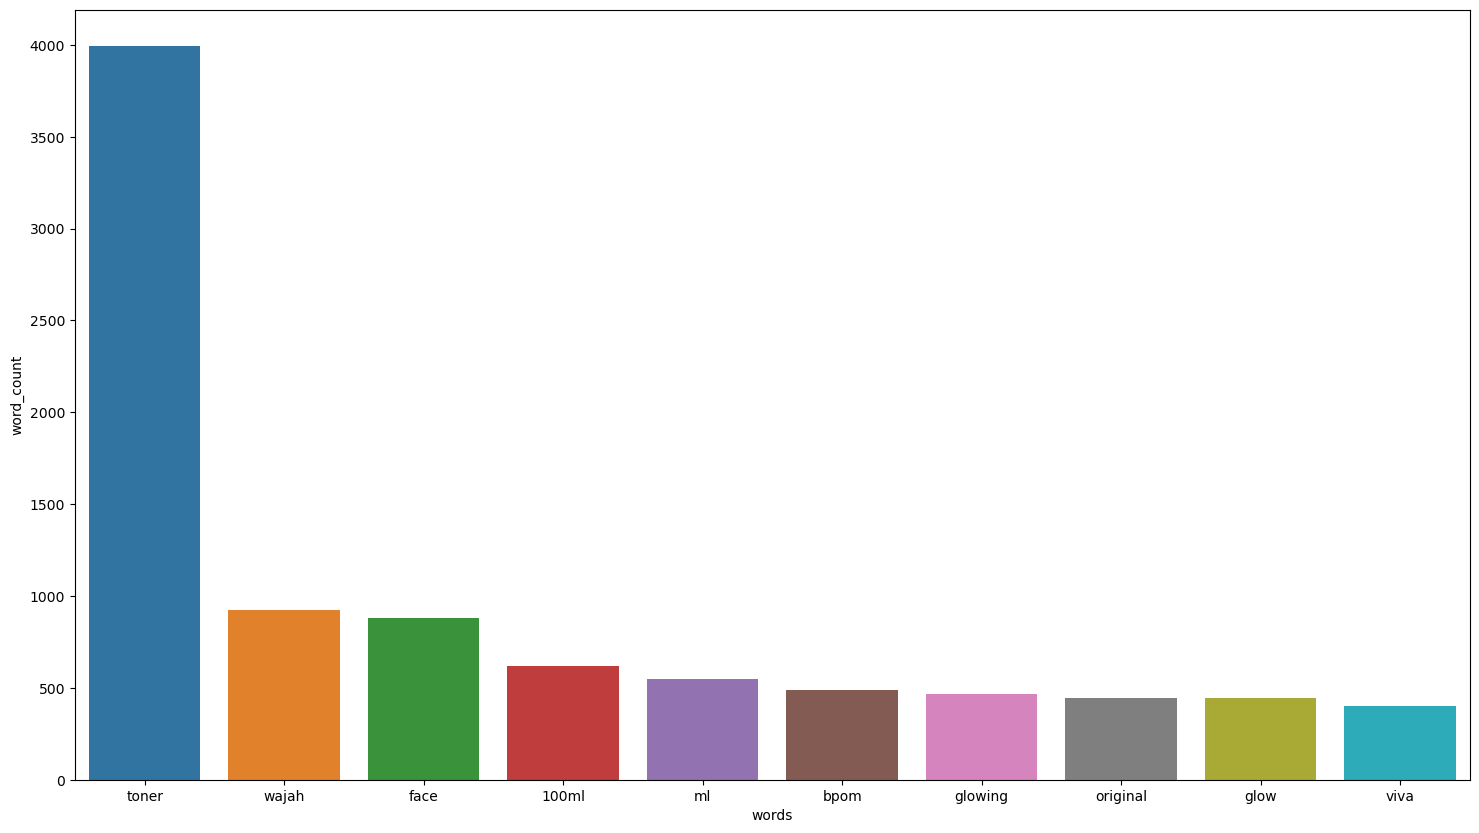

In [33]:
plt.figure(figsize= (18,10))
sns.barplot(data = topword_count ,x= topword_count['words'], y= topword_count['word_count'] )

In [34]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.data import find
from typing import List

# Cek jika stopwords bahasa Indonesia ada, jika tidak, download
try:
    find('corpora/stopwords.zip')
except:
    import nltk
    nltk.download('stopwords')

# Daftar stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Misalkan df adalah DataFrame utama dan sudah ada kolom 'df_tokenized'
df['df_no_stopwords'] = df['df_lower'].apply(lambda x: [word for word in x if word not in stop_words])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3695454596.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_no_stopwords'] = df['df_lower'].apply(lambda x: [word for word in x if word not in stop_words])


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation,df_cleaned,df_no_stopwords
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[orange, naturaworld, natura, beauty, spray, w...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w...",orange naturaworld natura beauty spray with dn...,"[orange, naturaworld, /, natura, beauty, spray..."
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[big, size, mireya, 11, in, 1, miracle, bright...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright...",big size mireya 11 in 1 miracle brightening fa...,"[(, big, size, ), mireya, 11, in, 1, miracle, ..."
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[toner, af, dwoble, glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]",toner af dwoble glow,"[toner, af, dwoble, glow]"
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[viva, air, mawar, original, bpom, best, value...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value...",viva air mawar original bpom best value product,"[viva, air, mawar, original, bpom, -, best, va..."
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[toner, collagen, 701, glowing, toner, colagen]","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]",toner collagen 701 glowing toner colagen,"[toner, collagen, 701, glowing, ,, toner, cola..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,https://www.lazada.co.id/products/nja-sinata-b...,NJA SINATA BEAUTY PAKET AGING GOLD PLUS SERUM ...,80000,0,0,Voucher 19%,Kab. Bogor,"[NJA, SINATA, BEAUTY, PAKET, AGING, GOLD, PLUS...",NJA SINATA BEAUTY PAKET AGING GOLD PLUS SERUM ...,"[nja, sinata, beauty, paket, aging, gold, plus...","[nja, sinata, beauty, paket, aging, gold, plus...","[nja, sinata, beauty, paket, aging, gold, plus...",nja sinata beauty paket aging gold plus serum ...,"[nja, sinata, beauty, paket, aging, gold, plus..."
8156,https://www.lazada.co.id/products/toner-acne-s...,Toner Acne Skincare UC Beauty BPOM dan Halal,15000,12,1,Voucher 70%,Kab. Tangerang,"[Toner, Acne, Skincare, UC, Beauty, BPOM, dan,...",Toner Acne Skincare UC Beauty BPOM dan Halal,"[toner, acne, skincare, uc, beauty, bpom, dan,...","[toner, acne, skincare, uc, beauty, bpom, dan,...","[toner, acne, skincare, uc, beauty, bpom, dan,...",toner acne skincare uc beauty bpom dan halal,"[toner, acne, skincare, uc, beauty, bpom, halal]"
8157,https://www.lazada.co.id/products/liftheng-hya...,LIFTHENG Hyaluronic Acid Saccharomyce Spray,12700,30,11,Koin 381,Kota Jakarta Barat,"[LIFTHENG, Hyaluronic, Acid, Saccharomyce, Spray]",LIFTHENG Hyaluronic Acid Saccharomyce Spray,"[liftheng, hyaluronic, acid, saccharomyce, spray]","[liftheng, hyaluronic, acid, saccharomyce, spray]","[liftheng, hyaluronic, acid, saccharomyce, spray]",liftheng hyaluronic acid saccharomyce spray,"[liftheng, hyaluronic, acid, saccharomyce, spray]"
8158,https://www.lazada.c

In [35]:
df['df_cleaned_stopwords'] = [' '.join(l) for l in df['df_no_stopwords']]
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\2110777422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_cleaned_stopwords'] = [' '.join(l) for l in df['df_no_stopwords']]


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation,df_cleaned,df_no_stopwords,df_cleaned_stopwords
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[orange, naturaworld, natura, beauty, spray, w...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w...",orange naturaworld natura beauty spray with dn...,"[orange, naturaworld, /, natura, beauty, spray...",orange naturaworld / natura beauty spray with ...
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[big, size, mireya, 11, in, 1, miracle, bright...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright...",big size mireya 11 in 1 miracle brightening fa...,"[(, big, size, ), mireya, 11, in, 1, miracle, ...",( big size ) mireya 11 in 1 miracle brightenin...
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[toner, af, dwoble, glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]",toner af dwoble glow,"[toner, af, dwoble, glow]",toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[viva, air, mawar, original, bpom, best, value...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value...",viva air mawar original bpom best value product,"[viva, air, mawar, original, bpom, -, best, va...",viva air mawar original bpom - best value product
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[toner, collagen, 701, glowing, toner, colagen]","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]",toner collagen 701 glowing toner colagen,"[toner, collagen, 701, glowing, ,, toner, cola...","toner collagen 701 glowing , toner colagen"


In [36]:
df_no_stopwords = df['df_no_stopwords']
df_words = combine_words(df_no_stopwords)
df_words[:20]

['orange',
 'naturaworld',
 '/',
 'natura',
 'beauty',
 'spray',
 'with',
 'dna',
 'salmon',
 'glutathione',
 'collagen',
 '60ml',
 'bpom',
 '(',
 'big',
 'size',
 ')',
 'mireya',
 '11',
 'in']

In [37]:
df_topword_count = count_topwords(df_words)
df_topword_count.head(10)

,words,word_count
26,toner,3992
34,-,1094
45,wajah,926
23,face,878
2,/,759
61,100ml,620
73,ml,549
154,|,526
12,bpom,488
39,glowing,466


<Axes: xlabel='words', ylabel='word_count'>

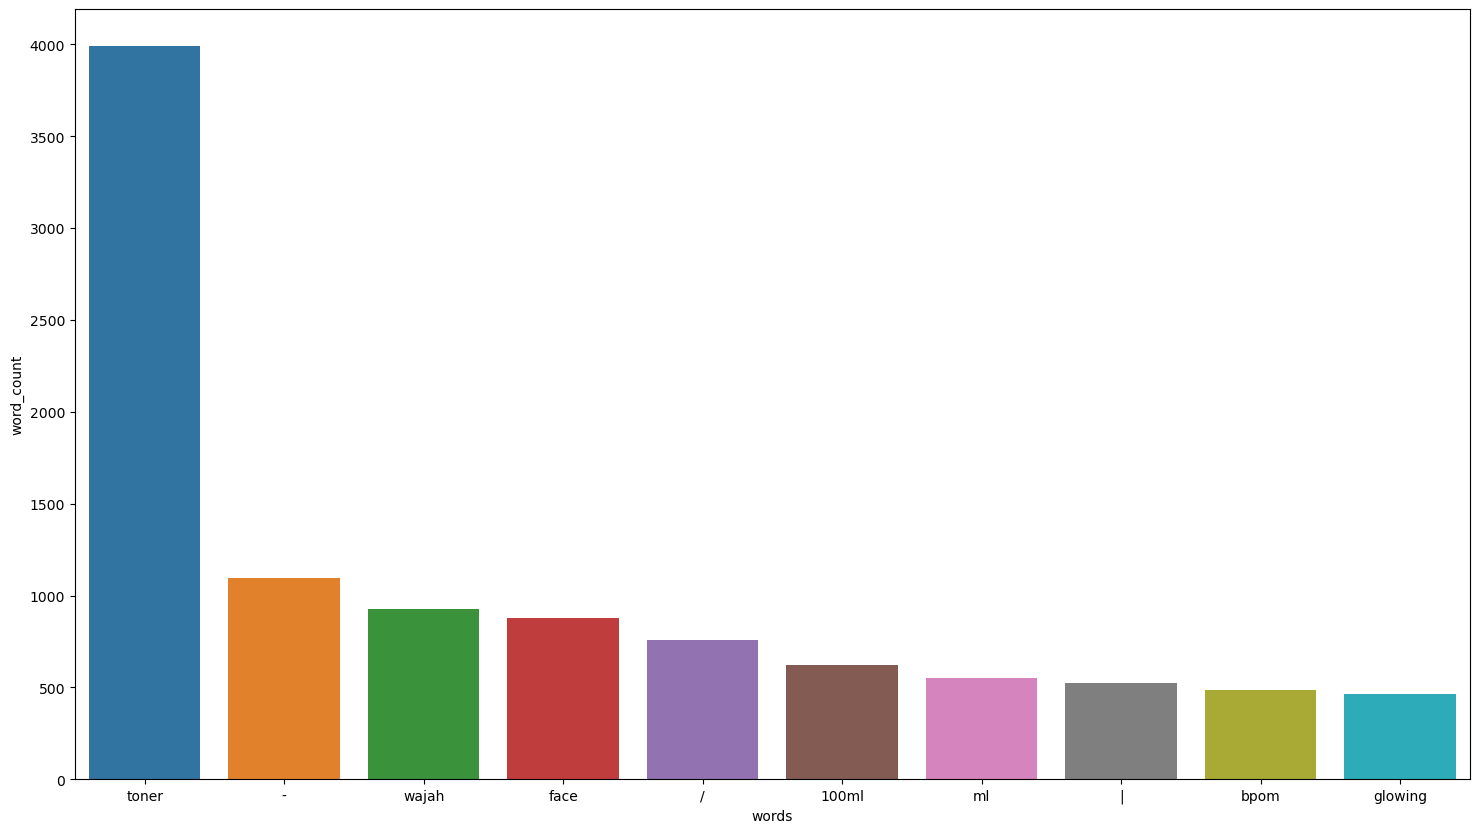

In [38]:
plt.figure(figsize= (18,10))
sns.barplot(data = df_topword_count ,x= df_topword_count['words'], y= df_topword_count['word_count'] )

In [39]:
import pandas as pd
import re

# Fungsi untuk membersihkan nama produk dan menjaga kata 'PA' dan 'UV' tetap besar
def clean_and_format_product_name(name):
    # Menghapus angka
    cleaned_name = re.sub(r'\d+', '', name)
    # Menghapus karakter yang tidak diinginkan (simbol, emotikon, dll.)
    cleaned_name = re.sub(r'[^\w\s]', '', cleaned_name)
    # Mengubah teks menjadi huruf kecil
    cleaned_name = cleaned_name.lower()
    # Menjaga kata tertentu dalam huruf kapital
    words = cleaned_name.split()
    formatted_words = [word.upper() if word in ['pa', 'uv'] else word for word in words]
    # Menggabungkan kata-kata yang telah diformat
    formatted_name = ' '.join(formatted_words)
    return formatted_name
    
# Terapkan fungsi pembersihan dan format ke kolom 'namaproduk'
df['df_cleaned_stopwords'] = df['namaproduk'].apply(clean_and_format_product_name)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\4073219521.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['df_cleaned_stopwords'] = df['namaproduk'].apply(clean_and_format_product_name)


,linkproduk,namaproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,no_contractions,df_no_contractions,df_tokenized,df_lower,df_no_punctuation,df_cleaned,df_no_stopwords,df_cleaned_stopwords
0,https://www.lazada.co.id/products/orange-natur...,ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,"[ORANGE, NATURAWORLD, /, NATURA, BEAUTY, SPRAY...",ORANGE NATURAWORLD / NATURA BEAUTY SPRAY WITH ...,"[orange, naturaworld, natura, beauty, spray, w...","[orange, naturaworld, /, natura, beauty, spray...","[orange, naturaworld, natura, beauty, spray, w...",orange naturaworld natura beauty spray with dn...,"[orange, naturaworld, /, natura, beauty, spray...",orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,21000,2500,1074,Koin 210,Kab. Bogor,"[(BIG, SIZE), Mireya, 11, in, 1, Miracle, Brig...",(BIG SIZE) Mireya 11 in 1 Miracle Brightening ...,"[big, size, mireya, 11, in, 1, miracle, bright...","[(, big, size, ), mireya, 11, in, 1, miracle, ...","[big, size, mireya, 11, in, 1, miracle, bright...",big size mireya 11 in 1 miracle brightening fa...,"[(, big, size, ), mireya, 11, in, 1, miracle, ...",big size mireya in miracle brightening face an...
2,https://www.lazada.co.id/products/toner-af-dwo...,Toner Af Dwoble Glow,45000,186,44,Tidak Ada,Kota Makassar,"[Toner, Af, Dwoble, Glow]",Toner Af Dwoble Glow,"[toner, af, dwoble, glow]","[toner, af, dwoble, glow]","[toner, af, dwoble, glow]",toner af dwoble glow,"[toner, af, dwoble, glow]",toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,Viva Air Mawar Original Bpom - Best Value Product,6500,3600,731,Tidak Ada,Kab. Bekasi,"[Viva, Air, Mawar, Original, Bpom, -, Best, Va...",Viva Air Mawar Original Bpom - Best Value Product,"[viva, air, mawar, original, bpom, best, value...","[viva, air, mawar, original, bpom, -, best, va...","[viva, air, mawar, original, bpom, best, value...",viva air mawar original bpom best value product,"[viva, air, mawar, original, bpom, -, best, va...",viva air mawar original bpom best value product
4,https://www.lazada.co.id/products/toner-collag...,"TONER COLLAGEN 701 Glowing, TONER Colagen",12000,297,47,Koin 600,Kota Jakarta Barat,"[TONER, COLLAGEN, 701, Glowing,, TONER, Colagen]","TONER COLLAGEN 701 Glowing, TONER Colagen","[toner, collagen, 701, glowing, toner, colagen]","[toner, collagen, 701, glowing, ,, toner, cola...","[toner, collagen, 701, glowing, toner, colagen]",toner collagen 701 glowing toner colagen,"[toner, collagen, 701, glowing, ,, toner, cola...",toner collagen glowing toner colagen


In [40]:
import string
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |

In [41]:
df.drop(columns=['no_contractions', 'df_no_contractions', 'df_tokenized', 'df_lower', 'df_no_punctuation', 'df_cleaned', 'df_no_stopwords', 'namaproduk'], inplace=True)
df.rename(columns={'df_cleaned_stopwords': 'namaproduk'}, inplace=True)
df.head(3)

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3627546124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['no_contractions', 'df_no_contractions', 'df_tokenized', 'df_lower', 'df_no_punctuation', 'df_cleaned', 'df_no_stopwords', 'namaproduk'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3627546124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'df_cleaned_stopwords': 'namaproduk'}, inplace=True)


,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,big size mireya in miracle brightening face an...
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow


In [42]:
# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

# Menampilkan daftar stopwords (opsional, untuk verifikasi)
print("Daftar stopwords:", stopwords)

# Fungsi untuk menghapus stopwords dari teks
def filter_stopwords(name):
    # Menghapus kata-kata bantu
    cleaned_words = [word for word in name.split() if word not in stopwords]
    # Menggabungkan kembali kata-kata menjadi kalimat
    return ' '.join(cleaned_words)
    
# Terapkan fungsi filtering stopwords ke kolom 'namaproduk'
df['namaproduk'] = df['namaproduk'].apply(filter_stopwords)
df.head()

Daftar stopwords: ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nant

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\1727979983.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['namaproduk'] = df['namaproduk'].apply(filter_stopwords)


,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,big size mireya in miracle brightening face an...
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar original bpom best value product
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen


In [43]:
import pandas as pd
import re

# Daftar kata singkatan dan kata tidak penting dalam huruf kecil
unimportant_words = {
    "utk", "pd", "dlm", "dgn", "sp", "sb", "info", "bpom", "pcs", "cuci", "gudang",
    "produk", "yang", "tidak", "penting", "baru", "terbaik", "bisa", "plus", "paket", 
    "sebagai", "untuk", "terbaru", "terdapat", "dengan", "special", "spesial",
    "adalah", "atau", "ini", "kami", "saja", "lebih", "harga", "menghilangkan", 
    "viraltermurah", "spesifikasi", "size", "bentuk", "model", "merk", "warna", 
    "freeongkir", "cod", "big", "sale", "promo", "diskon", "beli", "gratis", "gift", 
    "buy", "get", "hemat", "voucher", "harga murah", "flash sale", 
    "limited edition", "diskon besar", "spesial offer", "clearance", "viral", 
    "termurah", "terlaris", "exclusive", "limited", "top", "new", 
    "popular", "original", "review", "best", "exp726", "murah", "gratis", 
    "ecer", "grosir", "satu", "botol", "botol", "e", "ori", "ml", "halal"
}

# Fungsi untuk menghapus kata-kata tidak penting
def remove_unimportant_words(name):
    # Mengubah teks menjadi huruf kecil dan menghapus kata-kata tidak penting
    name = name.lower()  # Mengubah semua teks menjadi huruf kecil
    cleaned_words = [word for word in name.split() if word not in unimportant_words]
    
    # Menggabungkan kembali kata-kata menjadi kalimat
    return ' '.join(cleaned_words)

# Terapkan fungsi pembersihan ke kolom 'namaproduk' dengan .loc
df.loc[:, 'namaproduk'] = df['namaproduk'].apply(remove_unimportant_words)

# Tampilkan hasil
df.head(10)

,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar value product
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen
5,https://www.lazada.co.id/products/emedical-whi...,30000,27,9,Tidak Ada,Kab. Bogor,emedical whitening glow toner toner pencerah w...
6,https://www.lazada.co.id/products/toner-biru-f...,24900,1600,346,Voucher 45%,Kota Depok,toner biru flek beautyskin mljaminan uang apabila
7,https://www.lazada.co.id/products/face-mist-sa...,4446,10600,1542,Koin 44,Kota Bogor,face mist safron with niacinamide saffron face...
8,https://www.lazada.co.id/products/ecer-face-to...,35000,11,3,Tidak Ada,Kab. Serang,face toner crystal glow
9,https://www.lazada.co.id/products/viva-air-maw...,5940,3500,801,Koin 297,Kota Surabaya,viva air mawar rose water


## Melakukan kategori setiap daerahnya menjadi provinsi

In [44]:
# Dictionary pemetaan kota/kabupaten ke provinsi
pemetaan_provinsi = {
    'Kota Jakarta Barat': 'DKI Jakarta',
    'Kota Jakarta Utara': 'DKI Jakarta',
    'Kota Jakarta Selatan': 'DKI Jakarta',
    'Kota Jakarta Timur': 'DKI Jakarta',
    'Kota Jakarta Pusat': 'DKI Jakarta',
    'Kota Bekasi': 'Jawa Barat',
    'Kab. Bekasi': 'Jawa Barat',
    'Kab. Bogor': 'Jawa Barat',
    'Kab. Garut': 'Jawa Barat',
    'Kab. Majalengka': 'Jawa Barat',
    'Kab. Ciamis': 'Jawa Barat',
    'Kab. Cirebon': 'Jawa Barat',
    'Kota Cirebon': 'Jawa Barat',
    'Kab. Cianjur': 'Jawa Barat',
    'Kota Bandung': 'Jawa Barat',
    'Kab. Bandung': 'Jawa Barat',
    'Kab. Subang': 'Jawa Barat',
    'Kab. Sukoharjo': 'Jawa Barat',
    'Kota Banjar': 'Jawa Barat',
    'Kota Cimahi': 'Jawa Barat',
    'Kota Bogor': 'Jawa Barat',
    'Kab. Kuningan': 'Jawa Barat',
    'Kab. Purbalingga': 'Jawa Barat',
    'Kab. Bandung Barat': 'Jawa Barat',
    'Kota Tasikmalaya': 'Jawa Barat',
    'Kab. Purwakarta': 'Jawa Barat',
    'Kab. Sukabumi': 'Jawa Barat',
    'Kab. Sumedang': 'Jawa Barat',
    'Kab. Karawang': 'Jawa Barat',
    'Kota Depok': 'Jawa Barat',
    'Kota Tangerang Selatan': 'Jawa Barat',
    'Kab. Pangandaran': 'Jawa Barat',
    'Kota Sukabumi': 'Jawa Barat',
    'Kab. Indramayu': 'Jawa Barat',
    'Kab. Tasikmalaya': 'Jawa Barat',
    'Kab. Semarang': 'Jawa Tengah',
    'Kota Semarang': 'Jawa Tengah',
    'Kab. Pekalongan': 'Jawa Tengah',
    'Kab. Jepara': 'Jawa Tengah',
    'Kab. Pati': 'Jawa Tengah',
    'Kab. Kudus': 'Jawa Tengah',
    'Kab. Klaten': 'Jawa Tengah',
    'Kab. Demak': 'Jawa Tengah',
    'Kab. Pemalang': 'Jawa Tengah',
    'Kab. Tegal': 'Jawa Tengah',
    'Kab. Grobogan': 'Jawa Tengah',
    'Kab. Kendal': 'Jawa Tengah',
    'Kab. Banyumas': 'Jawa Tengah',
    'Kota Salatiga': 'Jawa Tengah',
    'Kota Pekalongan': 'Jawa Tengah',
    'Kab. Sragen': 'Jawa Tengah',
    'Kab. Brebes': 'Jawa Tengah',
    'Kab. Banjarnegara': 'Jawa Tengah',
    'Kab. Batang': 'Jawa Tengah',
    'Kab. Kebumen': 'Jawa Tengah',
    'Kab. Rembang': 'Jawa Tengah',
    'Kab. Cilacap': 'Jawa Tengah',
    'Kab. Madiun': 'Jawa Timur',
    'Kota Surabaya': 'Jawa Timur',
    'Kab. Sidoarjo': 'Jawa Timur',
    'Kab. Bondowoso': 'Jawa Timur',
    'Kab. Jember': 'Jawa Timur',
    'Kab. Banyuwangi': 'Jawa Timur',
    'Kab. Gresik': 'Jawa Timur',
    'Kota Madiun': 'Jawa Timur',
    'Kab. Magetan': 'Jawa Timur',
    'Kab. Malang': 'Jawa Timur',
    'Kota Malang': 'Jawa Timur',
    'Kota Batu': 'Jawa Timur',
    'Kab. Bojonegoro': 'Jawa Timur',
    'Kab. Ponorogo': 'Jawa Timur',
    'Kab. Kediri': 'Jawa Timur',
    'Kota Kediri': 'Jawa Timur',
    'Kab. Nganjuk': 'Jawa Timur',
    'Kab. Lamongan': 'Jawa Timur',
    'Kab. Pasuruan': 'Jawa Timur',
    'Kab. Probolinggo': 'Jawa Timur',
    'Kab. Jombang': 'Jawa Timur',
    'Kab. Blitar': 'Jawa Timur',
    'Kota Blitar': 'Jawa Timur',
    'Kota Mojokerto': 'Jawa Timur',
    'Kab. Mojokerto': 'Jawa Timur',
    'Kab. Tuban': 'Jawa Timur',
    'Kab. Trenggalek': 'Jawa Timur',
    'Kab. Karanganyar': 'Jawa Timur',
    'Kab. Sumenep': 'Jawa Timur',
    'Kab. Tulungagung': 'Jawa Timur',
    'Kota Pasuruan': 'Jawa Timur',
    'Kab. Bangkalan': 'Jawa Timur',
    'Kab. Ngawi': 'Jawa Timur',
    'Kab. Lumajang': 'Jawa Timur',
    'Kota Surakarta (Solo)': 'Jawa Tengah',
    'Kab. Boyolali': 'Jawa Tengah',
    'Kab. Purworejo': 'Jawa Tengah',
    'Kab. Wonogiri': 'Jawa Tengah',
    'Kab. Magelang': 'Jawa Tengah',
    'Kota Magelang': 'Jawa Tengah',
    'Kab. Wonosobo': 'Jawa Tengah',
    'Kota Tegal': 'Jawa Tengah',
    'Kab. Sleman': 'DIY Yogyakarta',
    'Kab. Bantul': 'DIY Yogyakarta',
    'Kota Yogyakarta': 'DIY Yogyakarta',
    'Kab. Gunung Kidul': 'DIY Yogyakarta',
    'Kab. Serang': 'Banten',
    'Kota Serang': 'Banten',
    'Kab. Pandeglang': 'Banten',
    'Kab. Lebak': 'Banten',
    'Kab. Tangerang': 'Banten',
    'Kota Tangerang': 'Banten',
    'Kota Tangerang Selatan': 'Banten',
    'Kota Cilegon': 'Banten',
    'Kota Medan': 'Sumatera Utara',
    'Kab. Deli Serdang': 'Sumatera Utara',
    'Kota Padang': 'Sumatera Barat',
    'Kota Bandar Lampung': 'Lampung',
    'Kab. Lampung Selatan': 'Lampung',
    'Kota Palembang': 'Sumatera Selatan',
    'Kab. Pringsewu': 'Lampung',
    'Kota Pekanbaru': 'Riau',
    'Kab. Karimun': 'Riau',
    'Kab. Siak': 'Riau',
    'Kota Jambi': 'Jambi',
    'Kota Denpasar': 'Bali',
    'Kab. Badung': 'Bali',
    'Kab. Tabanan': 'Bali',
    'Kota Makassar': 'Sulawesi Selatan',
    'Kab. Gowa': 'Sulawesi Selatan',
    'Kab. Takalar': 'Sulawesi Selatan',
    'Kab. Maros': 'Sulawesi Selatan',
    'Kab. Pangkajene Kepulauan': 'Sulawesi Selatan',
    'Kota Palu': 'Sulawesi Tengah',
    'Kota Samarinda': 'Kalimantan Timur',
    'Kota Balikpapan': 'Kalimantan Timur',
    'Kota Banjarmasin': 'Kalimantan Selatan',
    'Kab. Hulu Sungai Utara': 'Kalimantan Selatan',
    'Kab. Tanah Bumbu': 'Kalimantan Selatan',
    'Kab. Luwu': 'Sulawesi Selatan',
    'Kota Banjarbaru': 'Kalimantan Selatan',
    'Kab. Mesuji': 'Lampung',
    'Kab. Bone': 'Sulawesi Selatan',
    'Kab. Bungo': 'Jambi',
    'Kab. Toba Samosir': 'Sumatera Utara',
    'Kab. Pacitan': 'Jawa Timur',
    'Kab. Situbondo': 'Jawa Timur',
    'Kab. Pamekasan': 'Jawa Timur',
    'Kab. Rokan Hulu': 'Riau',
    'Kota Singkawang': 'Kalimantan Barat',
    'Kota Dumai': 'Riau',
    'Kab. Karimun': 'Kepulauan Riau',
    'Kota Manado': 'Sulawesi Utara',
    'Kab. Lombok Timur': 'Nusa Tenggara Barat',
    'Kab. Kupang': 'Nusa Tenggara Timur',
    'Kota Metro': 'Lampung',
    'Kab. Pidie': 'Aceh',
    'Kota Binjai': 'Sumatera Utara',
    'Kab. Temanggung': 'Jawa Tengah',
    'Kab. Bireuen': 'Aceh',
    'Kab. Aceh Utara': 'Aceh',
    'Kota Banda Aceh': 'Aceh',
    'Kab. Tanjung Jabung Barat': 'Jambi',
    'Kab. Indragiri Hilir': 'Riau',
    'Kota Pontianak': 'Kalimantan Barat'
}
# Fungsi untuk menentukan provinsi dari kota/kabupaten
def assign_province(city):
    return pemetaan_provinsi.get(city, 'Unknown')
    
df.loc[:, 'provinsi'] = df['daerah'].apply(assign_province)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\995250532.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'provinsi'] = df['daerah'].apply(assign_province)


,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...,DKI Jakarta
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow,Sulawesi Selatan
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar value product,Jawa Barat
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta


In [45]:
unknown_data = df[df['provinsi'] == 'Unknown']
unknown_data

,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi


* Mengelompokkan 'provinsi' yang memiliki 'harga' paling tinggi

In [46]:
df.groupby('provinsi')['produkterjual'].max()

provinsi
Aceh                       6
Bali                     240
Banten                233800
DIY Yogyakarta          1200
DKI Jakarta           102700
Jambi                    151
Jawa Barat            114200
Jawa Tengah            11900
Jawa Timur             85400
Kalimantan Barat         779
Kalimantan Selatan        12
Kalimantan Timur           0
Lampung                 1400
Riau                      90
Sulawesi Selatan         917
Sumatera Barat            61
Sumatera Selatan         730
Sumatera Utara          6300
Name: produkterjual, dtype: int32

In [47]:
total_sales_per_area = df.groupby('daerah')['produkterjual'].sum()
top_3_areas = total_sales_per_area.nlargest(3)

# Menampilkan hasil
for i, (area, sales) in enumerate(top_3_areas.items(), start=1):
    print(f"Penjualan tertinggi ke-{i} terjadi di daerah {area} dengan total penjualan sebesar: {sales} produk.")

Penjualan tertinggi ke-1 terjadi di daerah Kota Tangerang dengan total penjualan sebesar: 624022 produk.
Penjualan tertinggi ke-2 terjadi di daerah Kota Surabaya dengan total penjualan sebesar: 351739 produk.
Penjualan tertinggi ke-3 terjadi di daerah Kota Jakarta Barat dengan total penjualan sebesar: 328758 produk.


In [48]:
total_sales_per_area = df.groupby('daerah')['produkterjual'].sum()
top_3_areas = total_sales_per_area.nlargest(3)

# Menampilkan hasil
for i, (area, sales) in enumerate(top_3_areas.items(), start=1):
    print(f"Penjualan tertinggi ke-{i} terjadi di daerah {area} dengan total penjualan sebesar: {sales} produk.")

Penjualan tertinggi ke-1 terjadi di daerah Kota Tangerang dengan total penjualan sebesar: 624022 produk.
Penjualan tertinggi ke-2 terjadi di daerah Kota Surabaya dengan total penjualan sebesar: 351739 produk.
Penjualan tertinggi ke-3 terjadi di daerah Kota Jakarta Barat dengan total penjualan sebesar: 328758 produk.


* Deteksi Outlier pada Data Harga

## Klasifikasi Merek Skincare berdasarkan namaproduk

In [49]:
import pandas as pd
import re

# Daftar merek skincare yang diurutkan sesuai abjad dan sudah dalam huruf kecil
brand_skincare = [
    'animate', 'aubeau', 'avoskin', 'azarine', 'benton', 'bio essence', 'bioaqua', 'centella asiatica', 'cindynal', 
    'clariderm', 'clean', 'cosrx', 'cuka apel', 'dazzle me', 'dear me beauty', 'elcy', 'elsheskin', 'emina', 'erha21', 
    'ertos', 'evershine', 'everwhite', 'fair and lovely', 'feali', 'for skins', 'garnier', 'gladglow', 
    'hada labo', 'hanasui', 'hatomugi', 'herborist', 'implora', 'innisfree', 'jrg', 'kiehl\'s', 'kleveru', 
    'klairs', 'la tulipe', 'laikou', 'laneige', 'l\'oreal paris', 'luxcrime', 'lumiwhite', 'marina', 'melasma', 'mineral botanica', 
    'ms glow', 'mustika ratu', 'nahda', 'natura', 'neutrogena', 'npure', 'oasea', 'omg', 'ovale', 'pixi', 'pixy', 'pratista', 
    'purbasari', 'pyunkang', 'raiku', 'ristra', 'safi', 'scarlett whitening', 'sensatia botanicals', 'skintific', 
    'some by mi', 'somethinc', 'sr12', 'temulawak', 'the aubree', 'the body shop', 'the originote', 'theraskin', 'thayers', 
    'true to skin', 'vienna', 'viva', 'wardah', 'whitelab', 'yoppo', 'you', 'steffi', 'clorismen', 'kelly', 
    'xi xiu', 'pigeon', 'precious skin', 'hauraskin'
]

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

# Fungsi untuk menentukan merek produk
def categorize_brand(name):
    name_cleaned = clean_text(name)
    for brand in brand_skincare:
        if brand in name_cleaned:
            return brand.title()  # Mengembalikan nama merek dalam format title case
    return 'Unknown'

# Terapkan fungsi pembersihan dan pengkategorian ke kolom 'namaproduk'
df['merek'] = df['namaproduk'].apply(categorize_brand)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\1805094055.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['merek'] = df['namaproduk'].apply(categorize_brand)


,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi,merek
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...,DKI Jakarta,Natura
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar value product,Jawa Barat,Viva
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown


* Menyaring Data dengan Merek Tidak Dikenal

In [50]:
unknown_data = df[df['merek'] == 'Unknown']
unknown_data

,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi,merek
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown
5,https://www.lazada.co.id/products/emedical-whi...,30000,27,9,Tidak Ada,Kab. Bogor,emedical whitening glow toner toner pencerah w...,Jawa Barat,Unknown
6,https://www.lazada.co.id/products/toner-biru-f...,24900,1600,346,Voucher 45%,Kota Depok,toner biru flek beautyskin mljaminan uang apabila,Jawa Barat,Unknown
...,...,...,...,...,...,...,...,...,...
8151,https://www.lazada.co.id/products/byzoe-face-s...,30000,38,11,Koin 600,Kab. Sidoarjo,byzoe face spray in serum wajah for women ala ...,Jawa Timur,Unknown
8155,https://www.lazada.co.id/products/nja-sinata-b...,80000,0,0,Voucher 19%,Kab. Bogor,nja sinata beauty aging gold serum in face ton...,Jawa Barat,Unknown
8156,https://www.lazada.co.id/products/toner-acne-s...,15000,12,1,Voucher 70%,Kab. Tangerang,toner acne skincare uc beauty,Banten,Unknown
8157,https://www.lazada.co.id/products/liftheng-hya...,12700,30,11,Koin 381,Kota Jakarta Barat,liftheng hyaluronic acid saccharomyce spray,DKI Jakarta,Unknown


In [51]:
unknown_data = df[df['merek'] == 'Unknown']
unknown_data

,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi,merek
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown
5,https://www.lazada.co.id/products/emedical-whi...,30000,27,9,Tidak Ada,Kab. Bogor,emedical whitening glow toner toner pencerah w...,Jawa Barat,Unknown
6,https://www.lazada.co.id/products/toner-biru-f...,24900,1600,346,Voucher 45%,Kota Depok,toner biru flek beautyskin mljaminan uang apabila,Jawa Barat,Unknown
...,...,...,...,...,...,...,...,...,...
8151,https://www.lazada.co.id/products/byzoe-face-s...,30000,38,11,Koin 600,Kab. Sidoarjo,byzoe face spray in serum wajah for women ala ...,Jawa Timur,Unknown
8155,https://www.lazada.co.id/products/nja-sinata-b...,80000,0,0,Voucher 19%,Kab. Bogor,nja sinata beauty aging gold serum in face ton...,Jawa Barat,Unknown
8156,https://www.lazada.co.id/products/toner-acne-s...,15000,12,1,Voucher 70%,Kab. Tangerang,toner acne skincare uc beauty,Banten,Unknown
8157,https://www.lazada.co.id/products/liftheng-hya...,12700,30,11,Koin 381,Kota Jakarta Barat,liftheng hyaluronic acid saccharomyce spray,DKI Jakarta,Unknown


* Top10 Produkterjual pada merek 'Unknow'

In [52]:
unknown_data = df[df['merek'] == 'Unknown']
top_10_unknown_products = unknown_data.sort_values(by='produkterjual', ascending=False).head(50)
top_10_unknown_products[['namaproduk', 'produkterjual']]

,namaproduk,produkterjual
5803,toner saffron with aloevera mencerahkan wajah ...,233800
179,air saffron with lemon facemist saffron face m...,149800
1994,toner glowing lemon wajah reseller mencerahkan...,74800
7354,toner glowing lemon wajah kinclong bersih peli...,52100
94,toner glowing lemon wajah kinclong bersih peli...,35400
6550,toner pembersih daki,19500
344,toner lemon wajah kinclong bersih wajah,12300
91,toner badan toner badan toner badan aleya tone...,10900
7,face mist safron with niacinamide saffron face...,10600
14,toner glowing ekstrak lemon toner flek jerawat,10600


## Analisis Lanjutan

#### Menampilkan Produk Teratas Berdasarkan Penjualan dan merek

In [53]:
sorted = df.sort_values(by='produkterjual', ascending=False)
top3 = sorted.head(3)
top3 = top3[['namaproduk', 'produkterjual']]
top3

,namaproduk,produkterjual
5803,toner saffron with aloevera mencerahkan wajah ...,233800
179,air saffron with lemon facemist saffron face m...,149800
30,clariderm astringent alkohol no toner pembersi...,114200


In [54]:
sorted_df = df.sort_values(by='produkterjual', ascending=False)
top = sorted_df.head()
top

,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi,merek
5803,https://www.lazada.co.id/products/60-ml-toner-...,6875,233800,12346,Koin 69,Kota Tangerang,toner saffron with aloevera mencerahkan wajah ...,Banten,Unknown
179,https://www.lazada.co.id/products/bpom-air-saf...,4911,149800,13020,Koin 147,Kota Tangerang,air saffron with lemon facemist saffron face m...,Banten,Unknown
30,https://www.lazada.co.id/products/clariderm-as...,36500,114200,24795,Voucher 34%,Kab. Bogor,clariderm astringent alkohol no toner pembersi...,Jawa Barat,Clariderm
23,https://www.lazada.co.id/products/npure-face-t...,23000,102700,39123,Voucher 29%,Kota Jakarta Utara,npure face toner centella asiatica cica series,DKI Jakarta,Centella Asiatica
430,https://www.lazada.co.id/products/viva-air-maw...,6253,85400,7977,Voucher 26%,Kota Surabaya,viva air mawar,Jawa Timur,Viva


In [55]:
# Menghitung total produkterjual per merek
total_penjualan_per_merek = df.groupby('merek')['produkterjual'].sum().sort_values(ascending=False)
total_penjualan_per_merek.head()

merek
Unknown              1061209
Viva                  391558
Clariderm             289769
Clean                 141919
Centella Asiatica     137895
Name: produkterjual, dtype: int32

#### Visualisasi Distribusi Penjualan Berdasarkan Merek Skincare

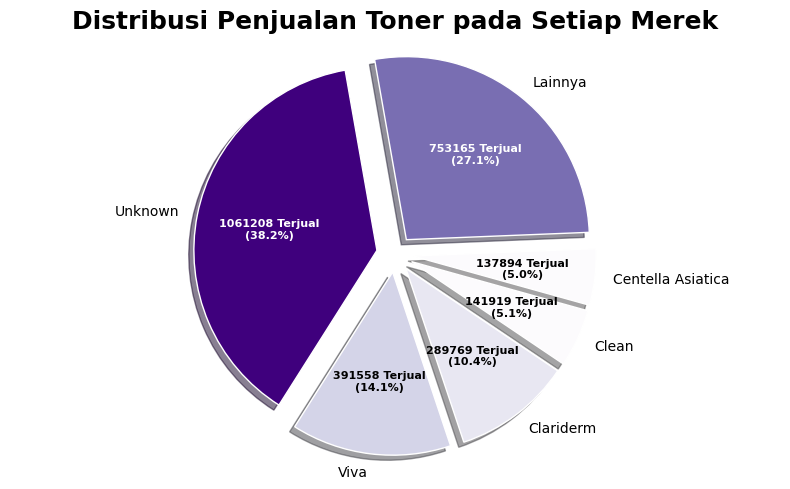

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total penjualan per merek
sales_per_merek = df.groupby('merek')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung total penjualan dan persentase per merek
total_sales = sales_per_merek.sum()
sales_percentage = (sales_per_merek / total_sales) * 100

# Menentukan threshold 4%
threshold_percentage = 4
small_mereks = sales_percentage[sales_percentage < threshold_percentage]

# Menggabungkan merek dengan persentase penjualan di bawah threshold
if not small_mereks.empty:
    top_mereks = sales_percentage[sales_percentage >= threshold_percentage]
    top_mereks['Lainnya'] = small_mereks.sum()
else:
    top_mereks = sales_percentage

# Normalisasi warna
norm = plt.Normalize(top_mereks.min(), top_mereks.max())
colors = plt.cm.Purples(norm(top_mereks))  # Palet warna ungu

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    top_mereks,
    labels=top_mereks.index,
    autopct=lambda p: f'{int(p * total_sales / 100)} Terjual\n({p:.1f}%)',
    startangle=100,
    colors=colors,
    explode=[0.1] * len(top_mereks),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Toner pada Setiap Merek', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

## Visualisasi Distribusi Penjualan Berdasarkan Provinsi

In [57]:
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
# Mengurutkan berdasarkan total penjualan dari yang tertinggi ke terendah
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
provinsi_penjualan

,provinsi,produkterjual
6,Jawa Barat,787418
2,Banten,747912
4,DKI Jakarta,696743
8,Jawa Timur,438173
7,Jawa Tengah,59665
17,Sumatera Utara,26366
3,DIY Yogyakarta,8705
16,Sumatera Selatan,3409
14,Sulawesi Selatan,2763
12,Lampung,2084


#### Visualisasi distribusi produkterjual Berdasarkan Provinsi

5 Provinsi Teratas Berdasarkan Total Penjualan Toner:
      provinsi  produkterjual
6   Jawa Barat         787418
2       Banten         747912
4  DKI Jakarta         696743
8   Jawa Timur         438173
7  Jawa Tengah          59665


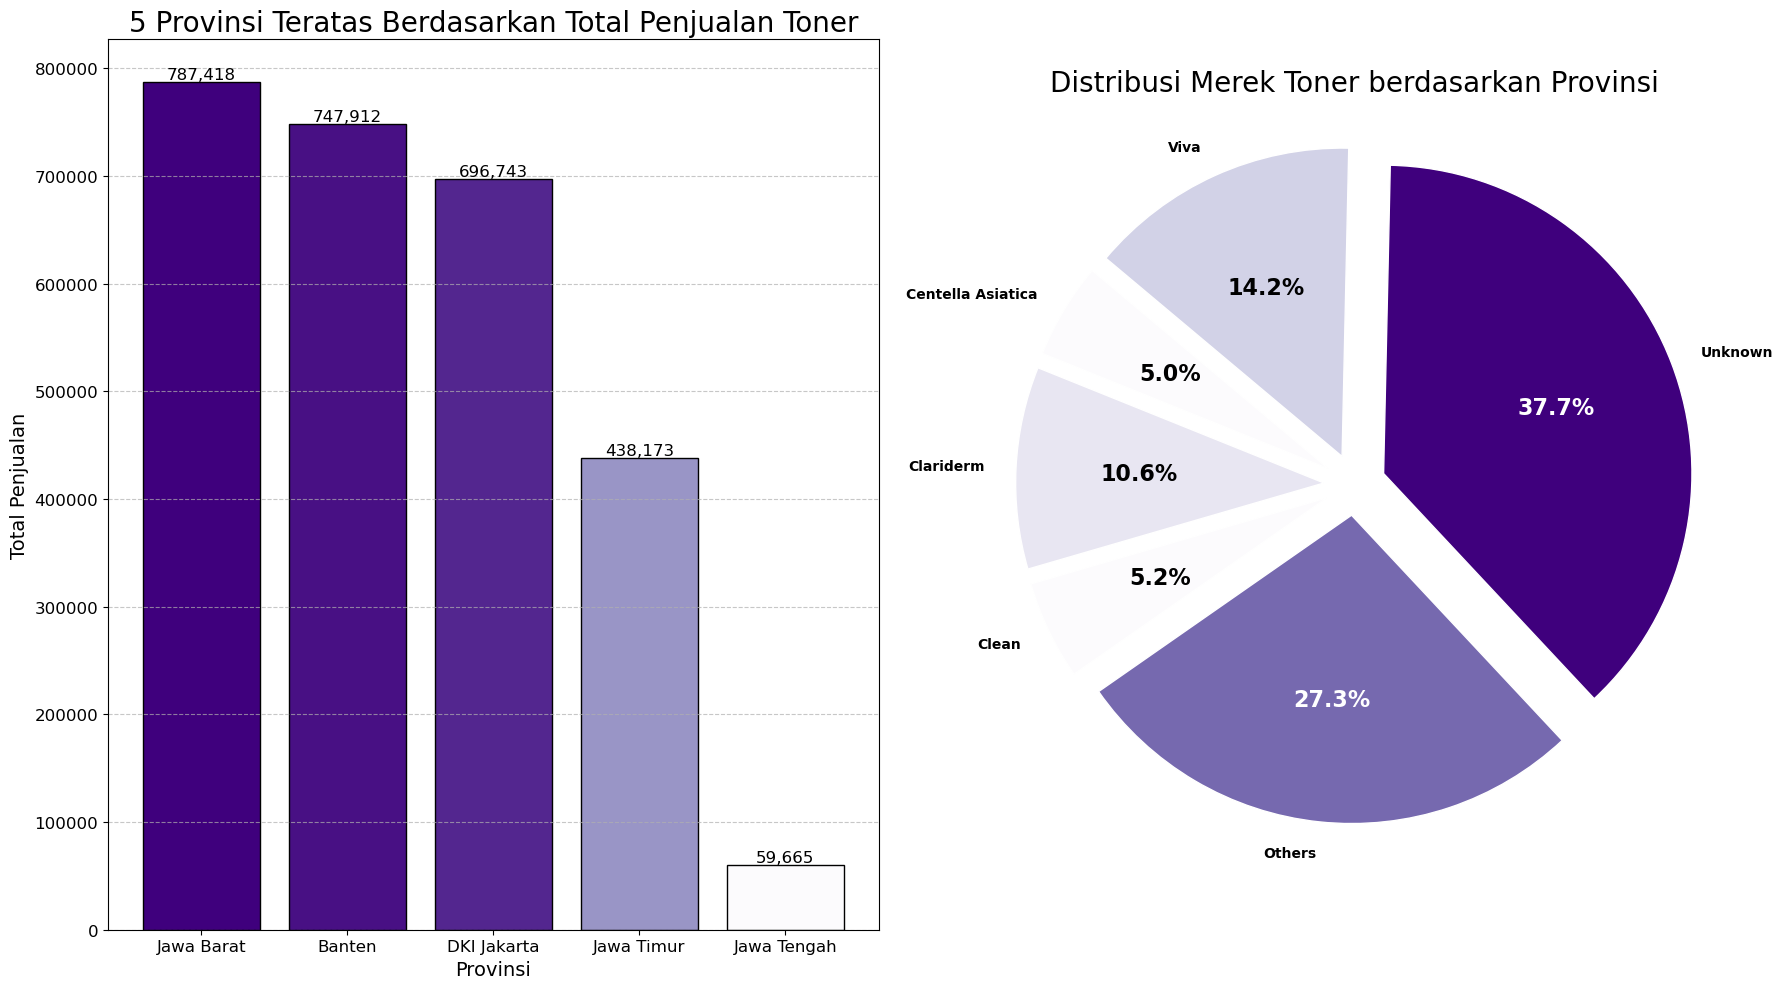

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menghitung total penjualan per provinsi
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
top_5_provinsi = provinsi_penjualan.head(5)
print("5 Provinsi Teratas Berdasarkan Total Penjualan Toner:")
print(top_5_provinsi)

# Menghitung jumlah produk terjual berdasarkan merek untuk top 5 provinsi
merek_per_provinsi = df[df['provinsi'].isin(top_5_provinsi['provinsi'])].groupby(['provinsi', 'merek'])['produkterjual'].sum().reset_index()

# Visualisasi Bar Chart
plt.figure(figsize=(18, 10))

# Bar Chart
plt.subplot(1, 2, 1)
norm = plt.Normalize(top_5_provinsi['produkterjual'].min(), top_5_provinsi['produkterjual'].max())
colors = plt.cm.Purples(norm(top_5_provinsi['produkterjual']))  # Menggunakan palet ungu
bars = plt.bar(top_5_provinsi['provinsi'], top_5_provinsi['produkterjual'], color=colors, edgecolor='black')
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.title('5 Provinsi Teratas Berdasarkan Total Penjualan Toner', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Pie Chart untuk distribusi merek berdasarkan provinsi
plt.subplot(1, 2, 2)

# Menghitung total penjualan berdasarkan merek
merek_counts = merek_per_provinsi.groupby('merek')['produkterjual'].sum().reset_index()

# Hitung persentase penjualan per merek
total_sales = merek_counts['produkterjual'].sum()
merek_counts['percentage'] = (merek_counts['produkterjual'] / total_sales) * 100

# Tentukan kategori dengan persentase di bawah threshold
threshold_percentage = 4
small_brands = merek_counts[merek_counts['percentage'] < threshold_percentage]['merek']

# Gabungkan kategori kecil menjadi 'Others'
merek_counts.loc[merek_counts['merek'].isin(small_brands), 'merek'] = 'Others'
merek_counts = merek_counts.groupby('merek').sum().reset_index()

# Normalisasi warna untuk pie chart
norm = plt.Normalize(merek_counts['produkterjual'].min(), merek_counts['produkterjual'].max())
colors = plt.cm.Purples(norm(merek_counts['produkterjual']))  # Menggunakan palet ungu

# Pie Chart
explode = [0.1] * len(merek_counts)  # Mengatur eksplosi untuk menonjolkan bagian pie
wedges, texts, autotexts = plt.pie(merek_counts['produkterjual'], labels=merek_counts['merek'], 
                                    autopct='%1.1f%%', startangle=140, explode=explode, 
                                    wedgeprops={'edgecolor': 'w'}, colors=colors, 
                                    textprops={'fontweight': 'bold'})  # Menjadikan teks bold
plt.title('Distribusi Merek Toner berdasarkan Provinsi', fontsize=20)

# Menyesuaikan warna teks di dalam pie chart
for j, autotext in enumerate(autotexts):
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')  # Menjadikan teks di dalam pie chart bold
    # Mengubah warna teks berdasarkan warna irisan
    if colors[j][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

plt.tight_layout()
plt.show()

#### Distribusi Penjualan Berdasarkan Jenis Produk dan Daerah pada tiap provinsi

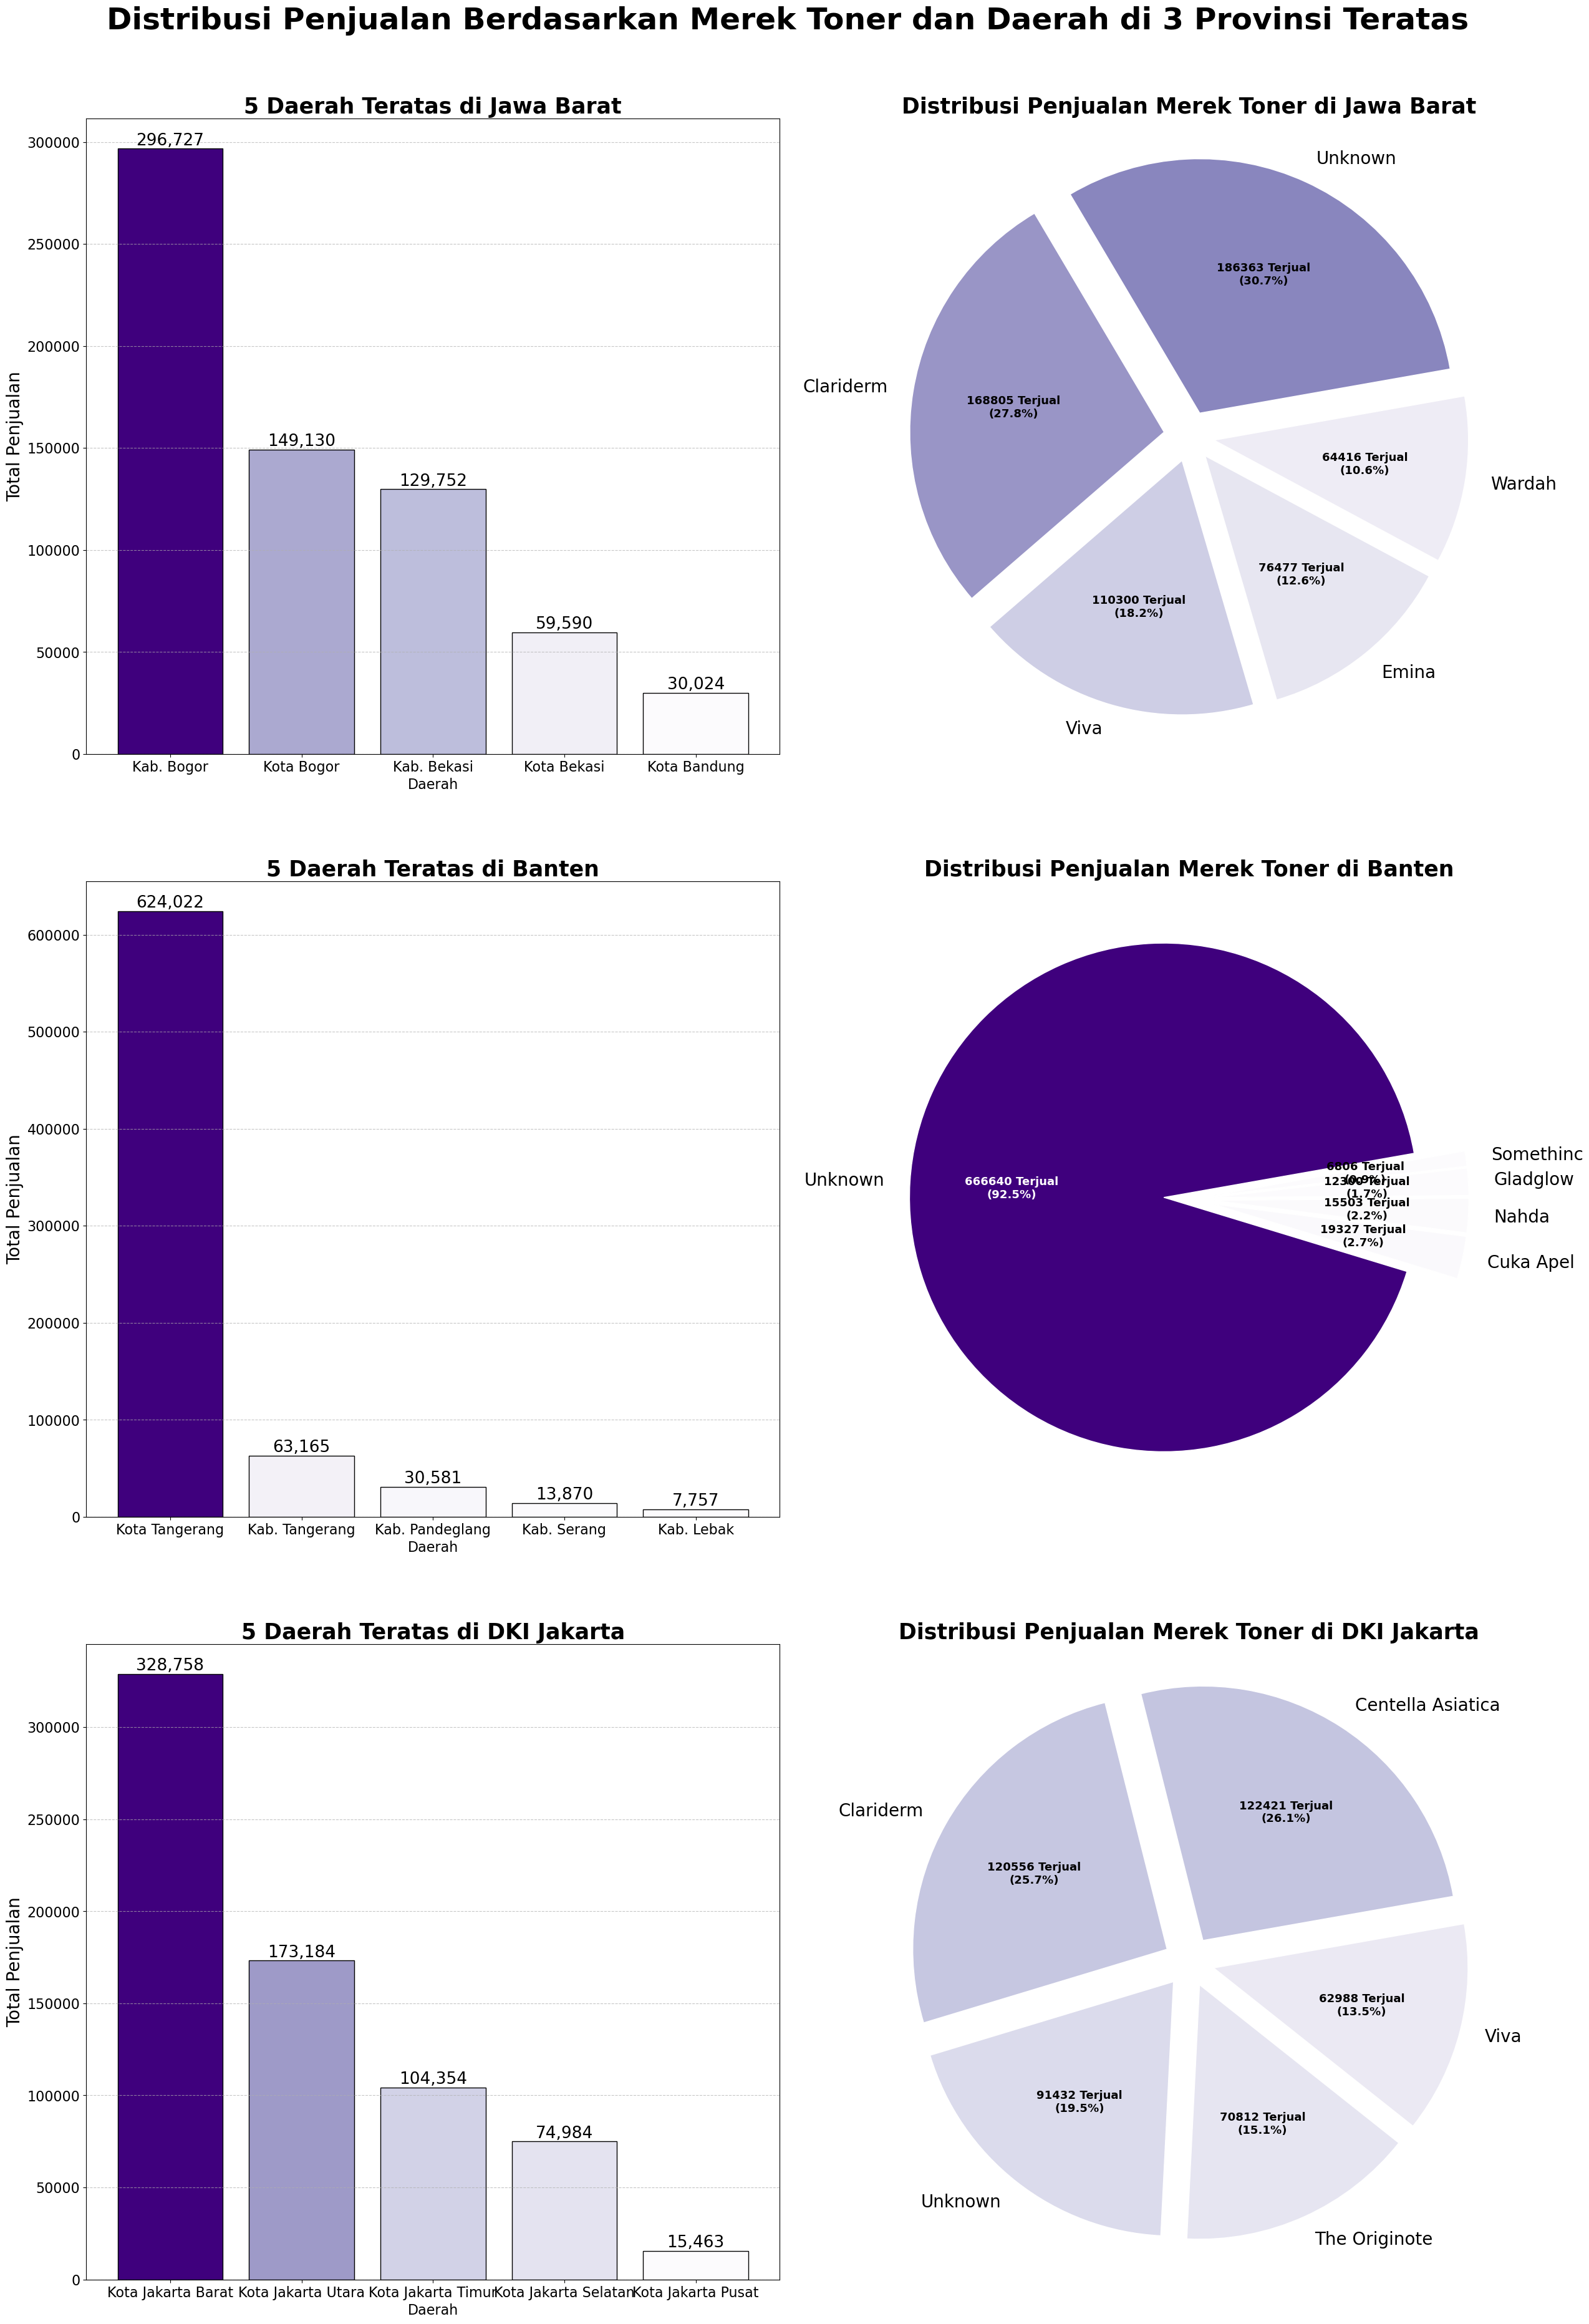

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total produk terjual per provinsi
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
top_3_provinsi = provinsi_penjualan.head(3)
top_3_provinsi_list = top_3_provinsi['provinsi'].tolist()

# Filter data untuk top 3 provinsi
top_3_data = df[df['provinsi'].isin(top_3_provinsi_list)]

# Visualisasi
fig, axs = plt.subplots(len(top_3_provinsi_list), 2, figsize=(30, 15 * len(top_3_provinsi_list)))
fig.suptitle('Distribusi Penjualan Berdasarkan Merek Toner dan Daerah di 3 Provinsi Teratas', fontsize=35, y=0.92, fontweight='bold')
fig.subplots_adjust(hspace=0.2, wspace=0.09)

for i, provinsi in enumerate(top_3_provinsi_list):
    prov_data = top_3_data[top_3_data['provinsi'] == provinsi]
    
    # Bar Chart untuk distribusi daerah berdasarkan produk terjual
    bar_data = prov_data.groupby('daerah')['produkterjual'].sum().reset_index()
    bar_data = bar_data.sort_values(by='produkterjual', ascending=False).head(5)
    
    # Normalisasi warna
    norm = plt.Normalize(bar_data['produkterjual'].min(), bar_data['produkterjual'].max())
    bar_colors = plt.cm.Purples(norm(bar_data['produkterjual']))  # Palet ungu
    
    bars = axs[i, 0].bar(
        bar_data['daerah'], 
        bar_data['produkterjual'], 
        color=bar_colors, 
        edgecolor='black'
    )
    axs[i, 0].set_ylabel('Total Penjualan', fontsize=20)
    axs[i, 0].set_xlabel('Daerah', fontsize=16)
    axs[i, 0].set_title(f'5 Daerah Teratas di {provinsi}', fontsize=25, fontweight='bold')
    axs[i, 0].tick_params(axis='both', labelsize=16)
    axs[i, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Menambahkan anotasi nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        axs[i, 0].text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:,.0f}', 
            ha='center', 
            va='bottom', 
            fontsize=19, 
            color='black'
        )
    
    # Pie Chart untuk distribusi produk terjual berdasarkan merek
    pie_data = prov_data.groupby('merek')['produkterjual'].sum().reset_index()
    pie_data = pie_data.sort_values(by='produkterjual', ascending=False).head(5)

    # Normalisasi warna untuk pie chart
    pie_colors = plt.cm.Purples(norm(pie_data['produkterjual']))  # Palet ungu
    
    # Mengatur eksplosi untuk menonjolkan bagian pie
    explode = [0.1] * len(pie_data)
    
    wedges, texts, autotexts = axs[i, 1].pie(
        pie_data['produkterjual'], 
        labels=pie_data['merek'],  
        autopct=lambda p: f'{int(p * pie_data["produkterjual"].sum() / 100)} Terjual\n({p:.1f}%)',
        colors=pie_colors, 
        startangle=10, 
        explode=explode, 
        wedgeprops={'edgecolor': 'w'}
    )
    axs[i, 1].set_title(f'Distribusi Penjualan Merek Toner di {provinsi}', fontsize=25, fontweight='bold')
    
    # Menyesuaikan ukuran font dan jarak label
    for text in texts:
        text.set_fontsize(20)
    for j, autotext in enumerate(autotexts):
        autotext.set_fontsize(13)
        autotext.set_fontweight('bold')  # Menjadikan teks di dalam pie chart bold
        # Mengubah warna teks berdasarkan warna irisan
        if pie_colors[j][0] < 0.5:  # Jika warna gelap
            autotext.set_color('white')
        else:  # Jika warna terang
            autotext.set_color('black')

plt.show()

#### Visualisasi distribusi produkterjual Berdasarkan Daerah

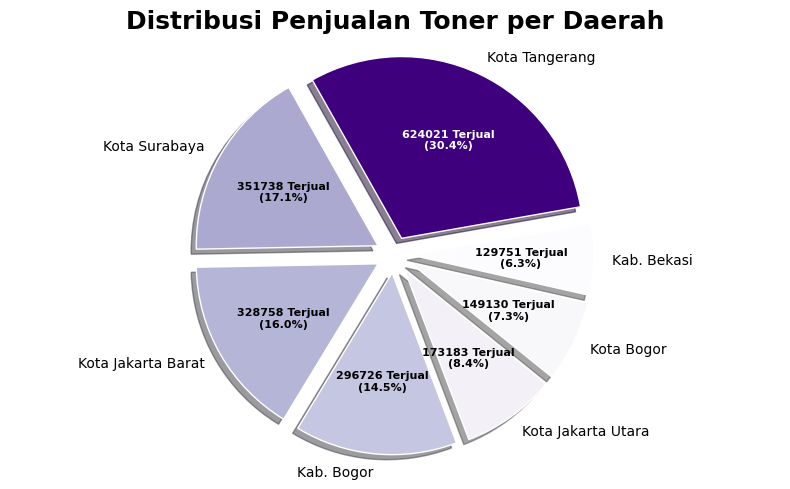

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total penjualan per daerah
sales_per_daerah = df.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menentukan 10 daerah teratas
top_daerahs = sales_per_daerah.head(7)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (top_daerahs / total_sales) * 100

# Menentukan threshold
threshold_percentage = 1
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Purples(norm(sales_percentage_updated))  # Palet warna diubah menjadi ungu

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Toner per Daerah', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Distribusi Penjualan Berdasarkan Jumlah Produk Terjual

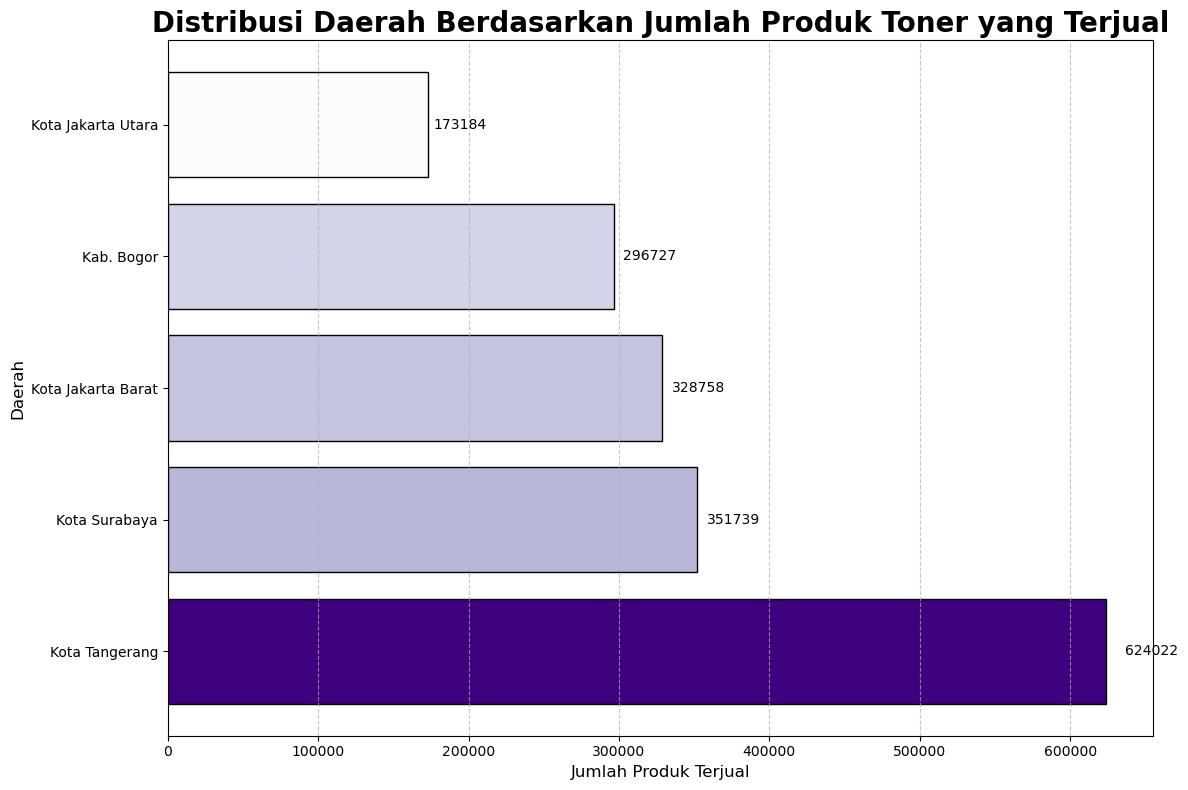

In [61]:
# Mengambil 10 daerah dengan penjualan terbanyak
top_daerah = df.groupby('daerah')['produkterjual'].sum().nlargest(5).reset_index()

# Visualisasi distribusi 'produkterjual' per kota
plt.figure(figsize=(12, 8))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi untuk mendapatkan skala warna
norm = plt.Normalize(top_daerah['produkterjual'].min(), top_daerah['produkterjual'].max())
colors = plt.cm.Purples(norm(top_daerah['produkterjual']))  # Menggunakan palet ungu

# Membuat horizontal bar chart
bars = plt.barh(top_daerah['daerah'], top_daerah['produkterjual'], color=colors, edgecolor='black')

# Menambahkan anotasi pada setiap bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.02 * xval, bar.get_y() + bar.get_height()/2, f'{int(xval)}', 
             ha='left', va='center', fontsize=10, color='black')

# Menyesuaikan elemen visual
plt.xlabel("Jumlah Produk Terjual", fontsize=12)
plt.ylabel("Daerah", fontsize=12)
plt.title("Distribusi Daerah Berdasarkan Jumlah Produk Toner yang Terjual", fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu x
plt.tight_layout()
plt.show()

#### Rata rata harga pada top 5 provinsi

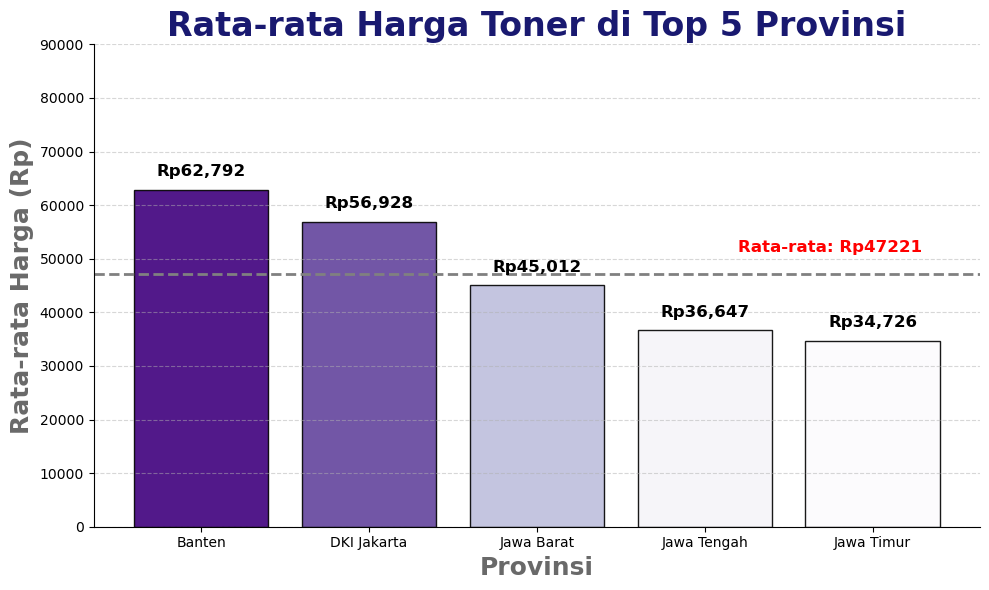

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menghitung total produk terjual per provinsi
total_terjual_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().reset_index()

# Memilih 5 provinsi teratas berdasarkan produk terjual terbanyak
top_5_provinsi = total_terjual_per_provinsi.nlargest(5, 'produkterjual')

# Filter data untuk 5 provinsi teratas
df_top_5_provinsi = df[df['provinsi'].isin(top_5_provinsi['provinsi'])]

# Menghitung rata-rata harga per provinsi di 5 provinsi teratas
avg_harga_top_5 = df_top_5_provinsi.groupby('provinsi')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5 = avg_harga_top_5.merge(top_5_provinsi, on='provinsi')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5['harga'].min(), avg_harga_top_5['harga'].max())
colors = plt.cm.Purples(norm(avg_harga_top_5['harga']))  # Menggunakan palet ungu

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Grafik: Rata-rata Harga di Top 5 Provinsi
barplot = plt.bar(avg_harga_top_5['provinsi'], avg_harga_top_5['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga Toner di Top 5 Provinsi', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Provinsi', fontsize=18, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=18, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 90.000
plt.ylim(0, 90000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 90001, 10000))  # Set interval setiap 10.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5['harga'].mean()
plt.axhline(mean_value, color='grey', linestyle='--', linewidth=2)
plt.text(3.2, mean_value + 4000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=12, fontweight='bold')

# Mengatur gaya grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menghilangkan spines untuk tampilan yang lebih bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')  # Menghilangkan latar belakang

# Menampilkan plot
plt.tight_layout()
plt.show()

## Pengelompokan Analisis berdasarkan Top 3 Provinsi teratas

In [63]:
# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)
# Identifikasi tiga provinsi dengan penjualan terbanyak
top_provinsi = sales_per_provinsi.head(3)  # Provinsi dengan penjualan terbanyak
print("Tiga provinsi dengan penjualan terbanyak:")
print(top_provinsi)

Tiga provinsi dengan penjualan terbanyak:
provinsi
Jawa Barat     787418
Banten         747912
DKI Jakarta    696743
Name: produkterjual, dtype: int32


### Jawa Barat

#### Distribusi Penjualan Produk Berdasarkan Daerah di Jawa Barat

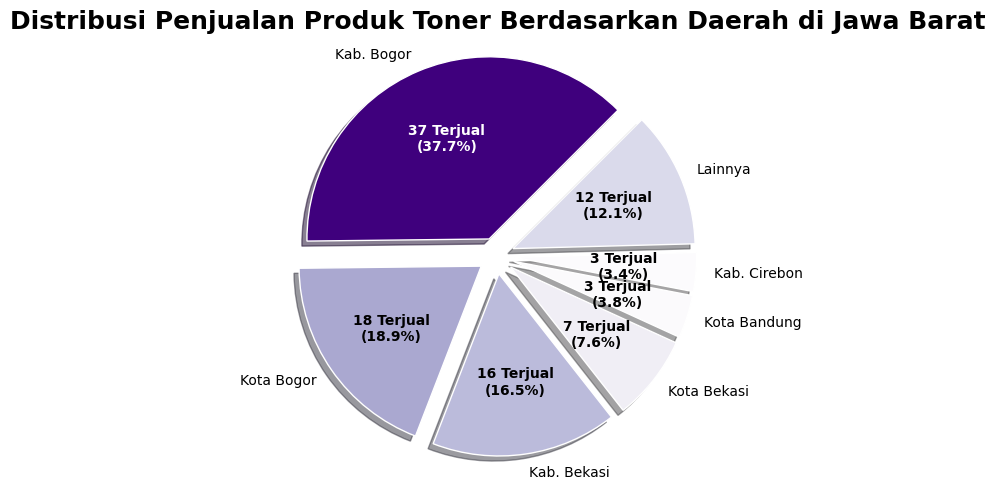

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan threshold
threshold_percentage = 3

# Filter data untuk Jawa Barat
jawa_barat_data = df[df['provinsi'] == 'Jawa Barat']

# Menghitung total produk terjual per daerah
sales_per_daerah = jawa_barat_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (sales_per_daerah / total_sales) * 100

# Menentukan daerah yang di bawah threshold
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menentukan daerah di atas threshold
top_daerahs = sales_percentage[sales_percentage >= threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Purples(norm(sales_percentage_updated))  # Menggunakan palet ungu

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=45,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Produk Toner Berdasarkan Daerah di Jawa Barat', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Distribusi Merek yang Terjual di Jawa Barat

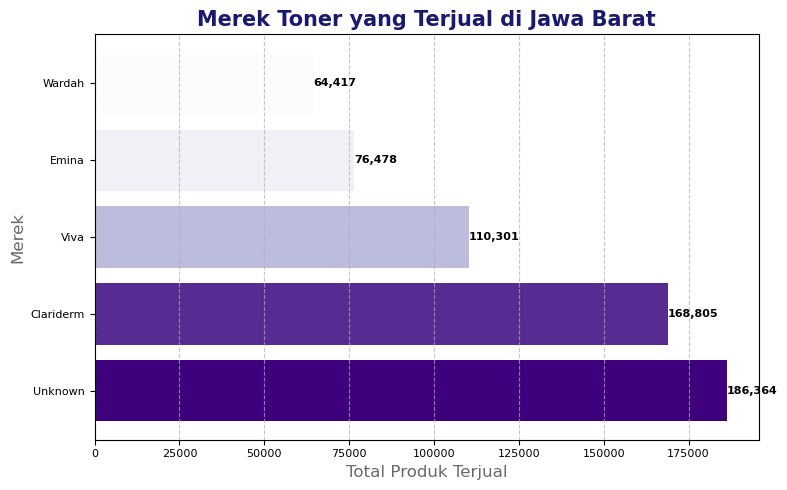

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Jawa Barat
jabar_data = df[df['provinsi'] == 'Jawa Barat']

# Menghitung total produk terjual per merek di Jawa Barat
merek_jabar = jabar_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_jabar = merek_jabar.sort_values(by='produkterjual', ascending=False)

# Mengambil top 5 merek
top_5_merek = merek_jabar.head(5)

# Membuat warna berdasarkan nilai produk terjual (dari gelap ke terang)
norm = plt.Normalize(top_5_merek['produkterjual'].min(), top_5_merek['produkterjual'].max())
colors = plt.cm.Purples(norm(top_5_merek['produkterjual']))  # Gunakan palet ungu

# Visualisasi
plt.figure(figsize=(8, 5))  # Ukuran figure
barplot = plt.barh(top_5_merek['merek'], top_5_merek['produkterjual'], color=colors)  # Menggunakan bar horizontal

# Menambahkan anotasi
for index, value in enumerate(top_5_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek Toner yang Terjual di Jawa Barat', fontsize=15, weight='bold', color='midnightblue')
plt.xlabel('Total Produk Terjual', fontsize=12, color='dimgray')
plt.ylabel('Merek', fontsize=12, color='dimgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi Jawa Barat dan merek 'unknown'

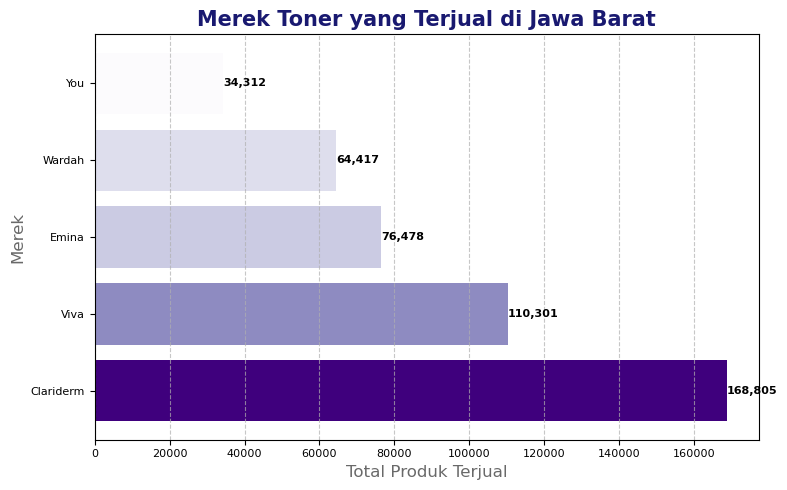

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Jawa Barat dan menghilangkan merek Unknown
jabar_data = df[(df['provinsi'] == 'Jawa Barat') & (df['merek'] != 'Unknown')]

# Menghitung total produk terjual per merek di Jawa Barat
merek_jabar = jabar_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_jabar = merek_jabar.sort_values(by='produkterjual', ascending=False)

# Mengambil top 5 merek
top_5_merek = merek_jabar.head(5)

# Membuat warna berdasarkan nilai produk terjual
norm = plt.Normalize(top_5_merek['produkterjual'].min(), top_5_merek['produkterjual'].max())
colors = plt.cm.Purples(norm(top_5_merek['produkterjual']))  # Menggunakan palet ungu tanpa dibalik

# Visualisasi
plt.figure(figsize=(8, 5))  # Ukuran figure
barplot = plt.barh(top_5_merek['merek'], top_5_merek['produkterjual'], color=colors)  # Menggunakan bar horizontal

# Menambahkan anotasi
for index, value in enumerate(top_5_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek Toner yang Terjual di Jawa Barat', fontsize=15, weight='bold', color='midnightblue')
plt.xlabel('Total Produk Terjual', fontsize=12, color='dimgray')
plt.ylabel('Merek', fontsize=12, color='dimgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [67]:
unknown_merek_jabar = df[(df['provinsi'] == 'Jawa Barat') & (df['merek'] == 'Unknown')]
unknown_jabar_sorted = unknown_merek_jabar[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_jabar = unknown_jabar_sorted.head(20)
unknown_jabar

,namaproduk,produkterjual
7,face mist safron with niacinamide saffron face...,10600
14,toner glowing ekstrak lemon toner flek jerawat,10600
402,dapet saffron face mist asli safron spray waja...,8600
187,toner kelupas ukuran dijamin cepat glowing cep...,7100
6461,toner kelupastoner flektoner whitening,5600
7192,pvc antis fliptop putih white hand sanitizer a...,5300
5880,toner keelupas glowing toner csd toner cream s...,4100
5115,toner csd toner cream susu domba baby pink ton...,3600
6288,cream mey glow x cepat putih ampuh cream wajah...,3300
495,toner whitening flek jerawat pemutih,3200


#### Distribusi promo di Provinsi Jawa Barat

Provinsi dengan penjualan terbanyak: Jawa Barat dengan jumlah produk terjual: 787418


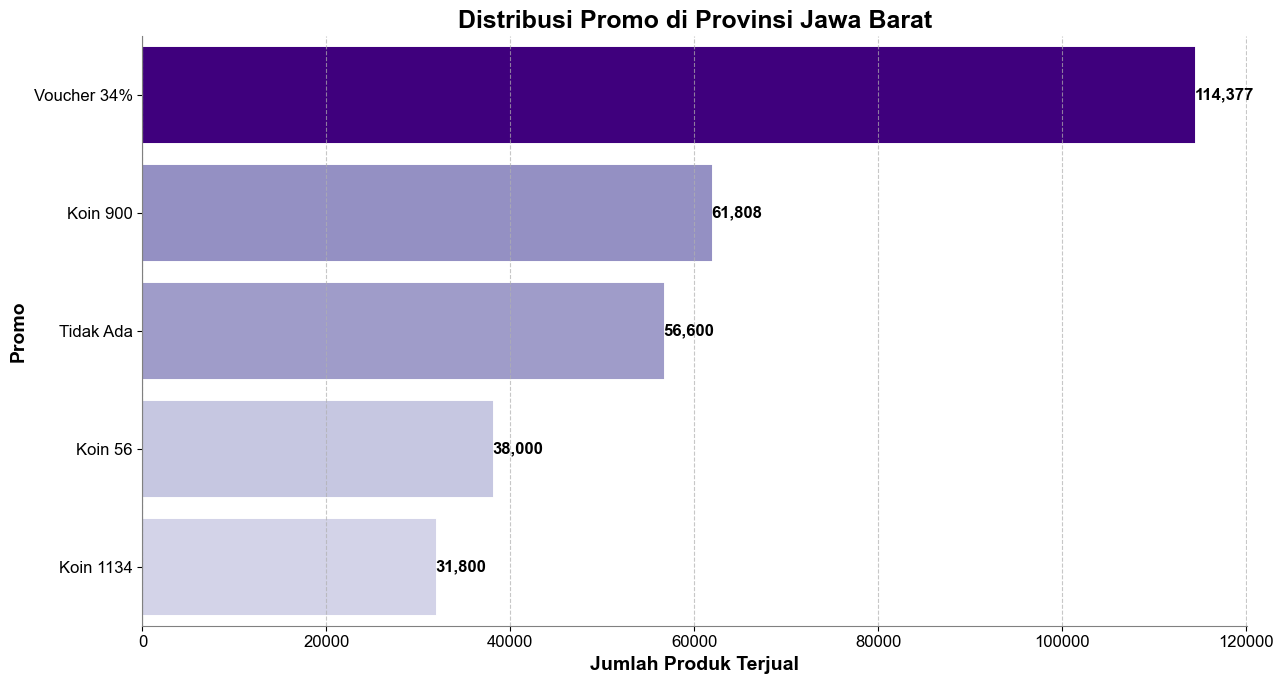

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi Jawa Barat
top_provinsi = 'Jawa Barat'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk Jawa Barat
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan promo di Jawa Barat
top_5_promo_provinsi = top_provinsi_data.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))
ax = sns.barplot(y=top_5_promo_provinsi.index, x=top_5_promo_provinsi.values, palette='Purples')  # Menggunakan palet ungu

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_promo_provinsi.max()
    color = plt.cm.Purples(color_value)
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi promo di daerah dengan penjualan terbanyak di provinsi Jawa Barat

Daerah dengan penjualan terbanyak di Jawa Barat: Kab. Bogor dengan jumlah produk terjual: 296727


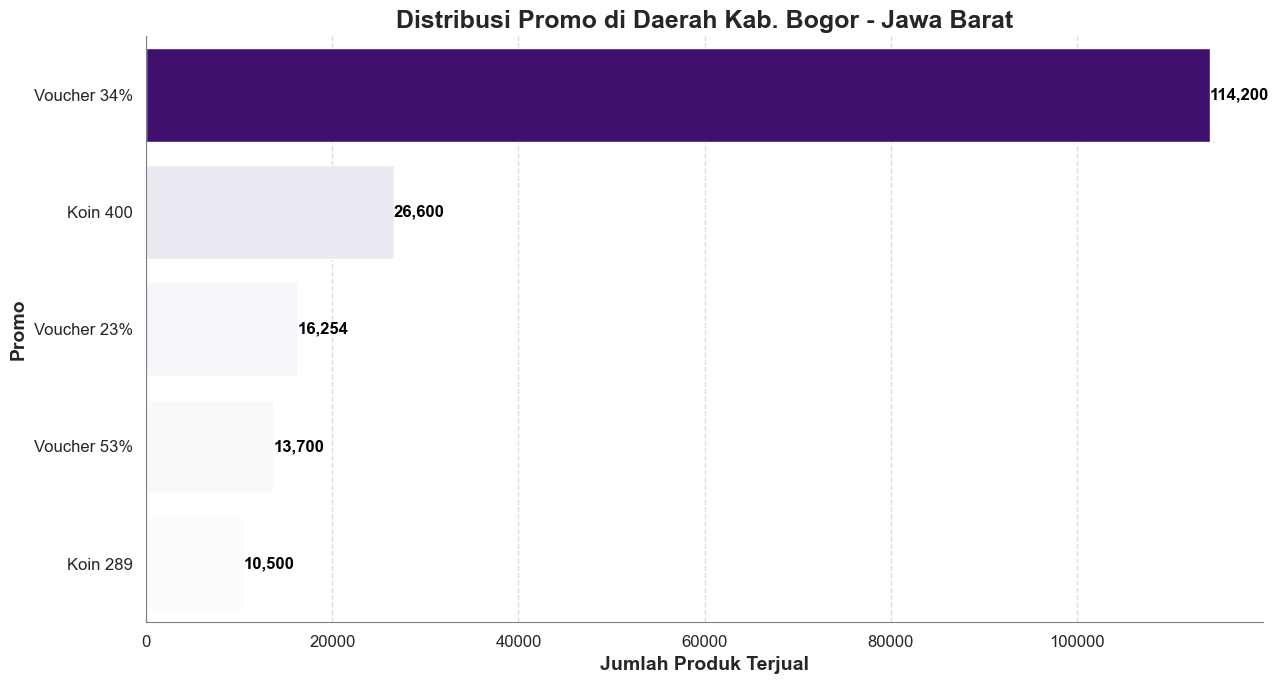

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Jawa Barat
jabar_data = df[df['provinsi'] == 'Jawa Barat']

# Total produk terjual per daerah di Jawa Barat
sales_per_daerah_jabar = jabar_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi daerah dengan penjualan terbanyak di Jawa Barat
top_daerah_jabar = sales_per_daerah_jabar.index[0]
top_daerah_sales_jabar = sales_per_daerah_jabar.iloc[0]
print(f"Daerah dengan penjualan terbanyak di Jawa Barat: {top_daerah_jabar} dengan jumlah produk terjual: {top_daerah_sales_jabar}")

# Filter data untuk daerah dengan penjualan terbanyak di Jawa Barat
top_daerah_data_jabar = jabar_data[jabar_data['daerah'] == top_daerah_jabar]

# Total produk terjual berdasarkan promo di daerah dengan penjualan terbanyak di Jawa Barat
top_5_promo_jabar = top_daerah_data_jabar.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi warna berdasarkan nilai
norm = plt.Normalize(top_5_promo_jabar.min(), top_5_promo_jabar.max())
colors = plt.cm.Purples(norm(top_5_promo_jabar.values))  # Menggunakan palet ungu

# Membuat barplot
ax = sns.barplot(y=top_5_promo_jabar.index, x=top_5_promo_jabar.values, palette=colors)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', (width + 5, p.get_y() + p.get_height() / 2.),  # Geser keterangan ke kanan
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Daerah {top_daerah_jabar} - Jawa Barat', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi Jawa Barat

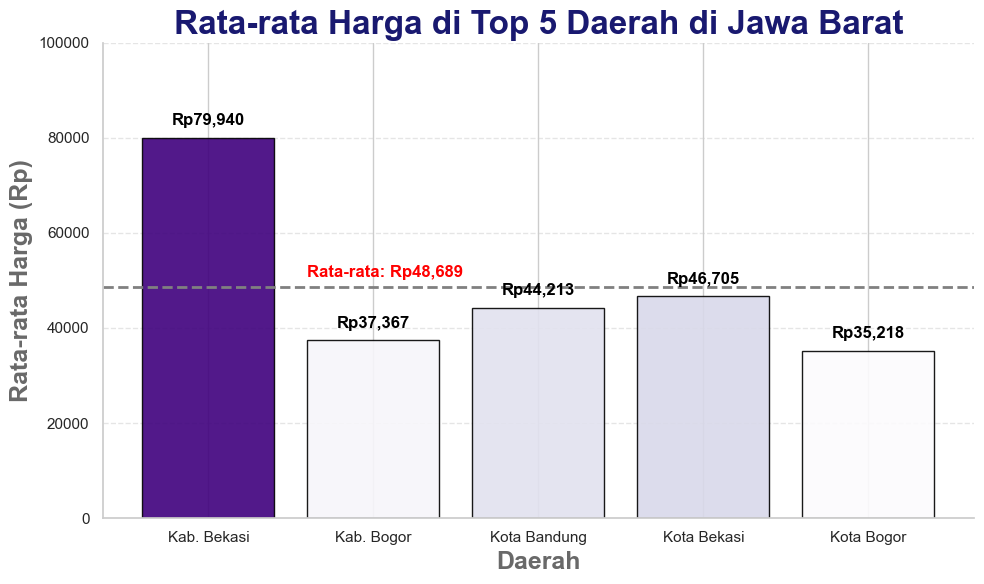

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi Jawa Barat
df_jabar = df[df['provinsi'] == 'Jawa Barat']

# Menghitung total produk terjual per daerah di Jawa Barat
total_terjual_per_daerah = df_jabar.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas di Jawa Barat berdasarkan produk terjual terbanyak
top_5_daerah_jabar = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas di Jawa Barat
df_top_5_daerah_jabar = df_jabar[df_jabar['daerah'].isin(top_5_daerah_jabar['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_jabar = df_top_5_daerah_jabar.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_jabar = avg_harga_top_5_jabar.merge(top_5_daerah_jabar, on='daerah')

# Membuat gradien warna berdasarkan harga (ungu)
norm = plt.Normalize(avg_harga_top_5_jabar['harga'].min(), avg_harga_top_5_jabar['harga'].max())
colors = plt.cm.Purples(norm(avg_harga_top_5_jabar['harga']))  # Menggunakan palet ungu

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Grafik: Rata-rata Harga di Top 5 Daerah di Jawa Barat
barplot = plt.bar(avg_harga_top_5_jabar['daerah'], avg_harga_top_5_jabar['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di Jawa Barat', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=18, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=18, weight='bold', color='dimgray')

# Mengatur batas sumbu Y
plt.ylim(0, 100000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 100001, 20000))  # Set interval setiap 20.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_jabar['harga'].mean()
plt.axhline(mean_value, color='grey', linestyle='--', linewidth=2)
plt.text(0.6, mean_value + 2000, f'Rata-rata: Rp{mean_value:,.0f}', color='red', fontsize=12, fontweight='bold')

# Mengatur gaya grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menghilangkan spines untuk tampilan yang lebih bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')  # Menghilangkan latar belakang

# Menampilkan plot
plt.tight_layout()
plt.show()

### Banten

#### Distribusi Penjualan Produk Berdasarkan Daerah di Banten

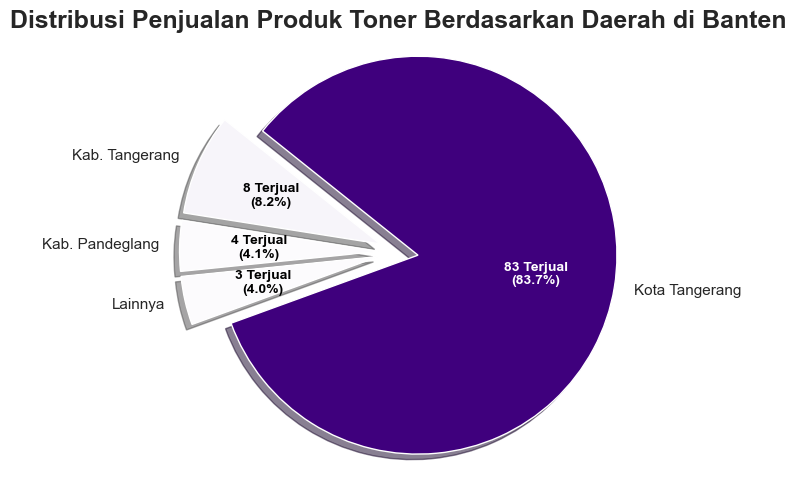

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan threshold
threshold_percentage = 3

# Filter data untuk provinsi Banten
banten_data = df[df['provinsi'] == 'Banten']

# Menghitung total produk terjual per daerah
sales_per_daerah = banten_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (sales_per_daerah / total_sales) * 100

# Menentukan daerah yang di bawah threshold
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menentukan daerah di atas threshold
top_daerahs = sales_percentage[sales_percentage >= threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Purples(norm(sales_percentage_updated))  # Menggunakan palet ungu

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=200,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Produk Toner Berdasarkan Daerah di Banten', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Distribusi Merek yang Terjual di Banten

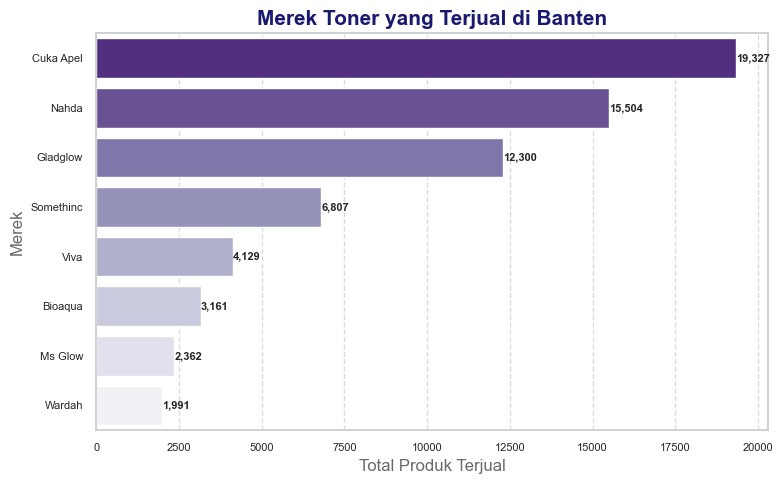

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Banten dan menghilangkan merek "Unknown"
banten_data = df[(df['provinsi'] == 'Banten') & (df['merek'] != 'Unknown')]

# Menghitung total produk terjual per merek di Banten
merek_banten = banten_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_banten = merek_banten.sort_values(by='produkterjual', ascending=False)

top_merek = merek_banten.head(8)  # Mengambil top 8 merek

# Visualisasi
plt.figure(figsize=(8, 5))  # Ukuran figure
# Menggunakan palet ungu yang dibalik
sns.barplot(x='produkterjual', y='merek', data=top_merek, palette='Purples_r')  # Palet ungu terbalik

# Menambahkan anotasi
for index, value in enumerate(top_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek Toner yang Terjual di Banten', fontsize=15, weight='bold', color='midnightblue')
plt.xlabel('Total Produk Terjual', fontsize=12, color='dimgray')
plt.ylabel('Merek', fontsize=12, color='dimgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi Banten dan merek 'unknown'

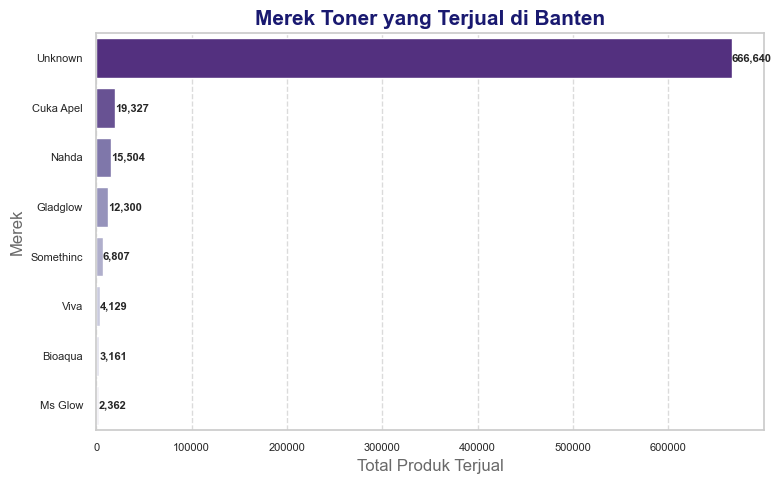

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Banten
banten_data = df[df['provinsi'] == 'Banten']

# Menghitung total produk terjual per merek di Banten
merek_banten = banten_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_banten = merek_banten.sort_values(by='produkterjual', ascending=False)

top_merek = merek_banten.head(8)  # Mengambil top 8 merek

# Visualisasi
plt.figure(figsize=(8, 5))  # Ukuran figure
# Menggunakan palet ungu yang dibalik
sns.barplot(x='produkterjual', y='merek', data=top_merek, palette='Purples_r')  # Palet ungu terbalik

# Menambahkan anotasi
for index, value in enumerate(top_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek Toner yang Terjual di Banten', fontsize=15, weight='bold', color='midnightblue')
plt.xlabel('Total Produk Terjual', fontsize=12, color='dimgray')
plt.ylabel('Merek', fontsize=12, color='dimgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [74]:
# Filter data untuk merek "Unknown" di provinsi Banten
unknown_merek_banten = df[(df['provinsi'] == 'Banten') & (df['merek'] == 'Unknown')]
unknown_banten_sorted = unknown_merek_banten[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_banten = unknown_banten_sorted.head(20)
unknown_banten

,namaproduk,produkterjual
5803,toner saffron with aloevera mencerahkan wajah ...,233800
179,air saffron with lemon facemist saffron face m...,149800
1994,toner glowing lemon wajah reseller mencerahkan...,74800
7354,toner glowing lemon wajah kinclong bersih peli...,52100
94,toner glowing lemon wajah kinclong bersih peli...,35400
6550,toner pembersih daki,19500
7433,toner pemutih pembersih kulit yoni toner bukan...,10100
6523,toner lemon toner penghilang flek wajah toner ...,8200
830,air saffron with lemon facemist saffron face m...,7800
6616,toner acne saffron with lemon,6300


#### Distribusi promo di Provinsi Banten

Provinsi dengan penjualan terbanyak: Banten dengan jumlah produk terjual: 747912


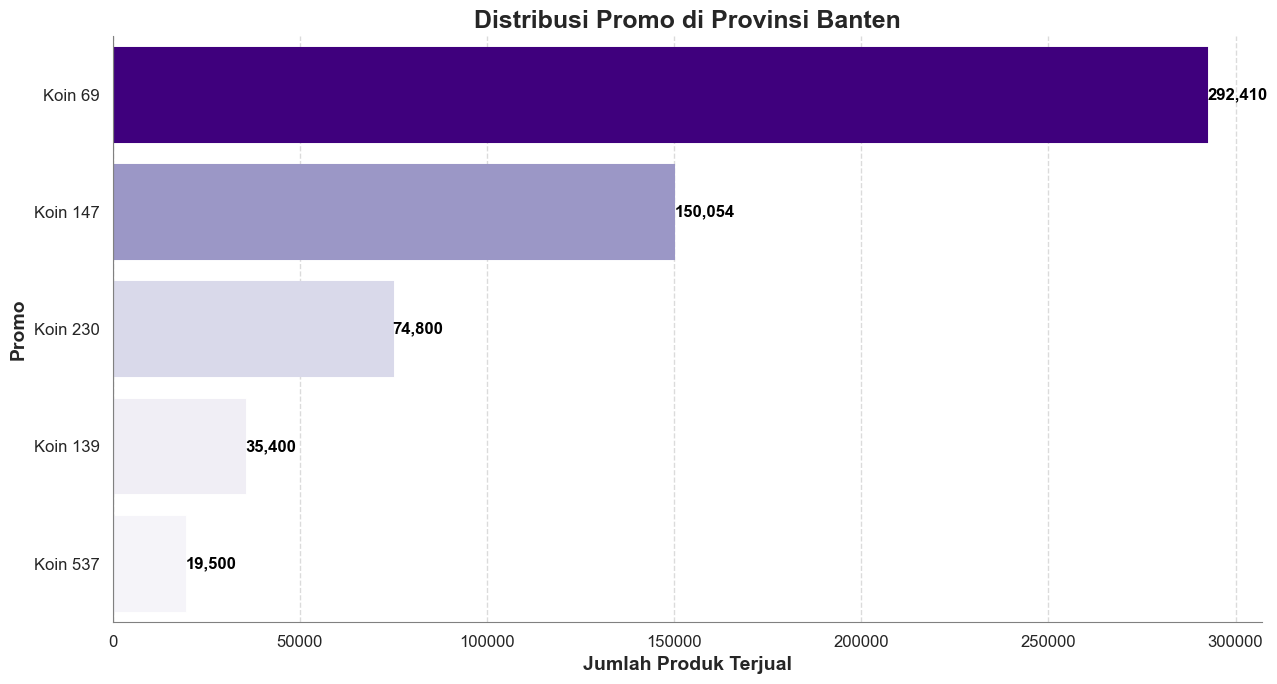

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi Banten
top_provinsi = 'Banten'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk Banten
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan promo di Banten
top_5_promo_provinsi = top_provinsi_data.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))
ax = sns.barplot(y=top_5_promo_provinsi.index, x=top_5_promo_provinsi.values, palette='Purples')  # Menggunakan palet ungu

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_promo_provinsi.max()
    color = plt.cm.Purples(color_value)
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi promo di daerah dengan penjualan terbanyak di provinsi Banten

Daerah dengan penjualan terbanyak di Banten: Kota Tangerang dengan jumlah produk terjual: 624022


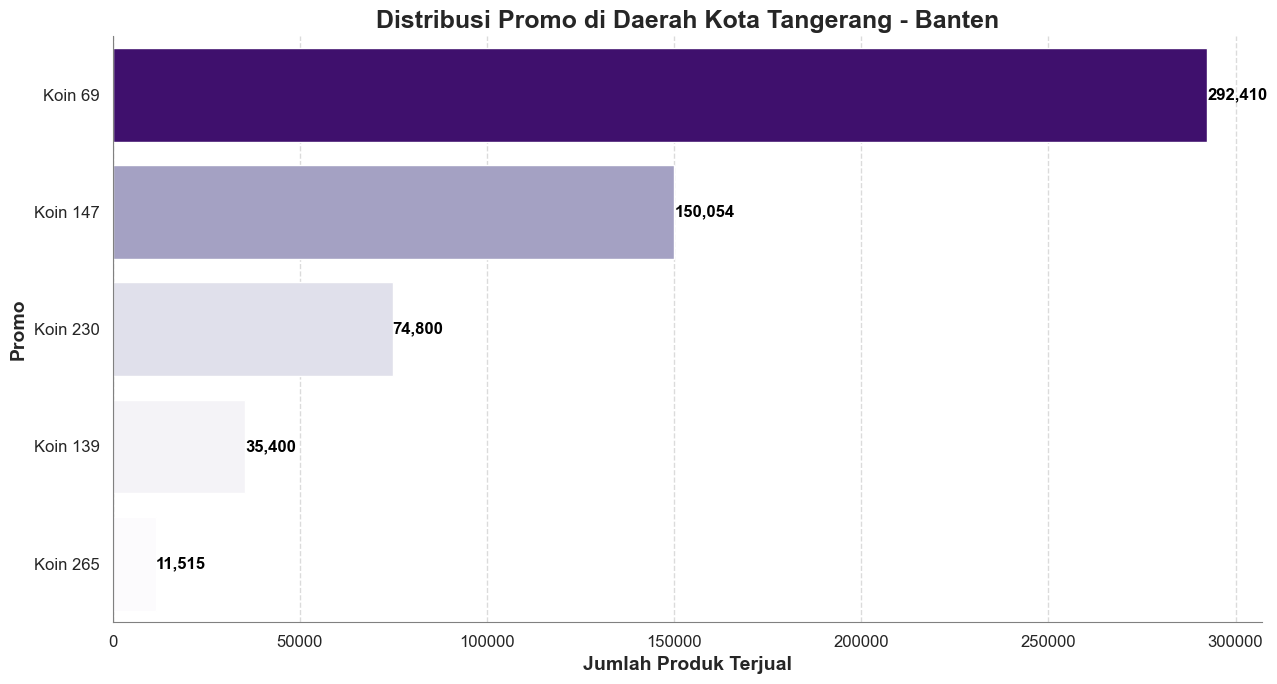

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Banten
banten_data = df[df['provinsi'] == 'Banten']

# Total produk terjual per daerah di Banten
sales_per_daerah_banten = banten_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi daerah dengan penjualan terbanyak di Banten
top_daerah_banten = sales_per_daerah_banten.index[0]
top_daerah_sales_banten = sales_per_daerah_banten.iloc[0]
print(f"Daerah dengan penjualan terbanyak di Banten: {top_daerah_banten} dengan jumlah produk terjual: {top_daerah_sales_banten}")

# Filter data untuk daerah dengan penjualan terbanyak di Banten
top_daerah_data_banten = banten_data[banten_data['daerah'] == top_daerah_banten]

# Total produk terjual berdasarkan promo di daerah dengan penjualan terbanyak di Banten
top_5_promo_banten = top_daerah_data_banten.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi warna berdasarkan nilai
norm = plt.Normalize(top_5_promo_banten.min(), top_5_promo_banten.max())
colors = plt.cm.Purples(norm(top_5_promo_banten.values))  # Menggunakan palet ungu

# Membuat barplot
ax = sns.barplot(y=top_5_promo_banten.index, x=top_5_promo_banten.values, palette=colors)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', (width + 5, p.get_y() + p.get_height() / 2.),  # Geser keterangan ke kanan
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Daerah {top_daerah_banten} - Banten', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi Banten

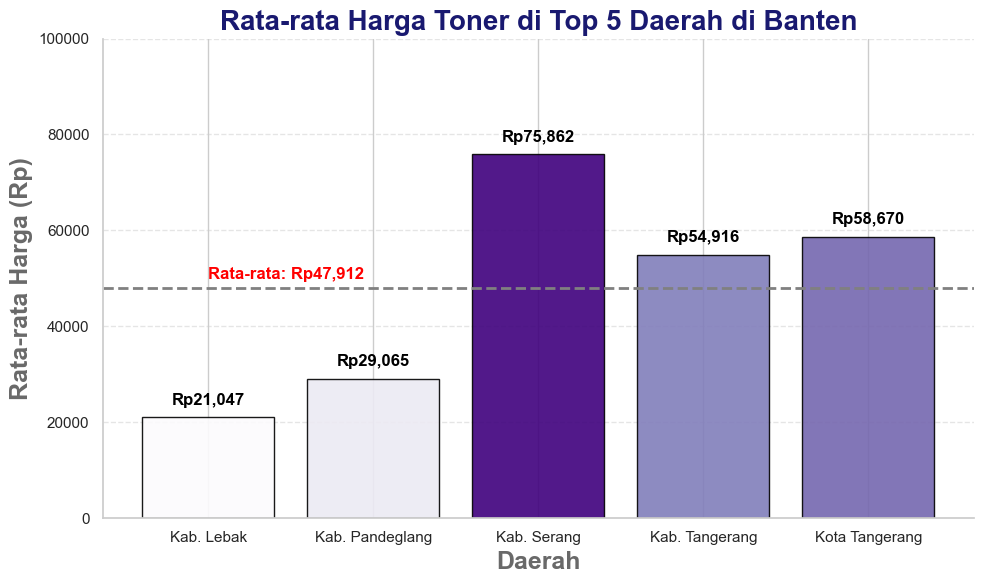

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi Banten
df_banten = df[df['provinsi'] == 'Banten']

# Menghitung total produk terjual per daerah di Banten
total_terjual_per_daerah = df_banten.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas di Banten berdasarkan produk terjual terbanyak
top_5_daerah_banten = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas di Banten
df_top_5_daerah_banten = df_banten[df_banten['daerah'].isin(top_5_daerah_banten['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_banten = df_top_5_daerah_banten.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_banten = avg_harga_top_5_banten.merge(top_5_daerah_banten, on='daerah')

# Membuat gradien warna berdasarkan harga (ungu)
norm = plt.Normalize(avg_harga_top_5_banten['harga'].min(), avg_harga_top_5_banten['harga'].max())
colors = plt.cm.Purples(norm(avg_harga_top_5_banten['harga']))  # Menggunakan palet ungu

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Grafik: Rata-rata Harga di Top 5 Daerah di Banten
barplot = plt.bar(avg_harga_top_5_banten['daerah'], avg_harga_top_5_banten['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga Toner di Top 5 Daerah di Banten', fontsize=20, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=18, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=18, weight='bold', color='dimgray')

# Mengatur batas sumbu Y
plt.ylim(0, 100000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 100001, 20000))  # Set interval setiap 20.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_banten['harga'].mean()
plt.axhline(mean_value, color='grey', linestyle='--', linewidth=2)
plt.text(0, mean_value + 2000, f'Rata-rata: Rp{mean_value:,.0f}', color='red', fontsize=12, fontweight='bold')

# Mengatur gaya grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menghilangkan spines untuk tampilan yang lebih bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')  # Menghilangkan latar belakang

# Menampilkan plot
plt.tight_layout()
plt.show()

### DKI Jakarta

#### Distribusi Penjualan Produk Berdasarkan Daerah di DKI Jakarta

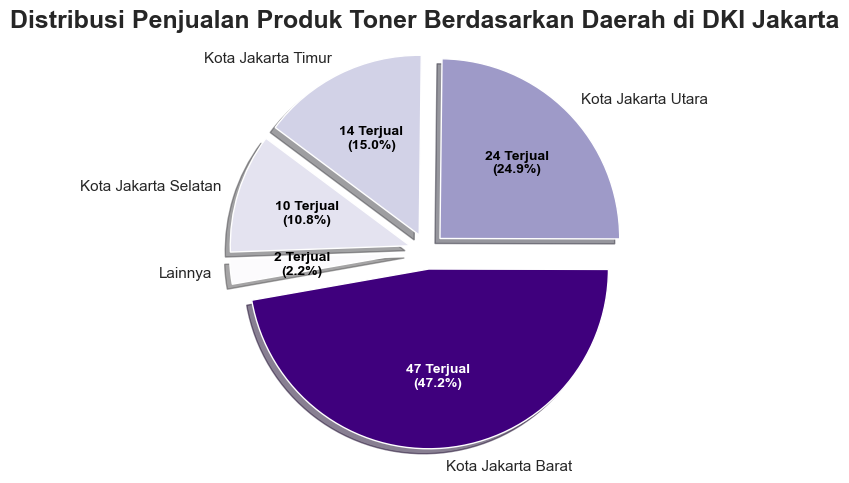

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan threshold
threshold_percentage = 3

# Filter data untuk provinsi DKI Jakarta
jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per daerah
sales_per_daerah = jakarta_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (sales_per_daerah / total_sales) * 100

# Menentukan daerah yang di bawah threshold
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menentukan daerah di atas threshold
top_daerahs = sales_percentage[sales_percentage >= threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Purples(norm(sales_percentage_updated))  # Menggunakan palet ungu

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=190,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Produk Toner Berdasarkan Daerah di DKI Jakarta', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Distribusi Merek yang Terjual di DKI Jakarta

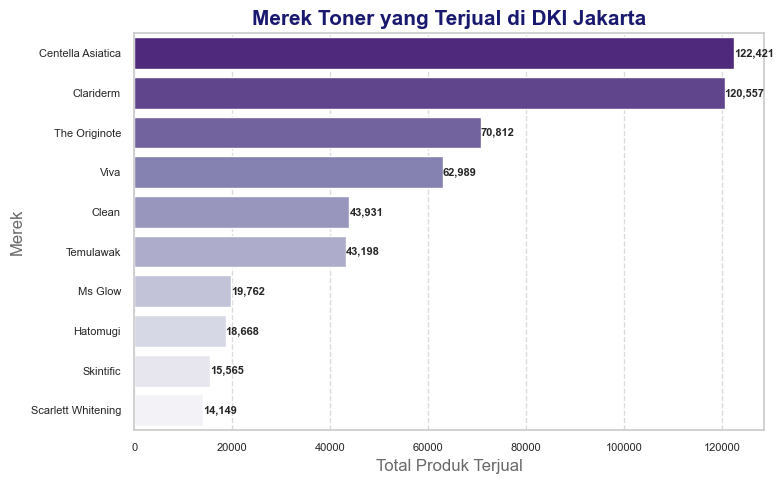

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi DKI Jakarta dan menghilangkan merek "Unknown"
jakarta_data = df[(df['provinsi'] == 'DKI Jakarta') & (df['merek'] != 'Unknown')]

# Menghitung total produk terjual per merek di DKI Jakarta
merek_jakarta = jakarta_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_jakarta = merek_jakarta.sort_values(by='produkterjual', ascending=False)

top_merek = merek_jakarta.head(10)  # Mengambil top 10 merek

# Visualisasi
plt.figure(figsize=(8, 5))  # Ukuran figure
# Menggunakan palet ungu terbalik sehingga warna gelap untuk nilai tinggi
sns.barplot(x='produkterjual', y='merek', data=top_merek, palette='Purples_r')  # Palet ungu terbalik

# Menambahkan anotasi
for index, value in enumerate(top_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek Toner yang Terjual di DKI Jakarta', fontsize=15, weight='bold', color='midnightblue')
plt.xlabel('Total Produk Terjual', fontsize=12, color='dimgray')
plt.ylabel('Merek', fontsize=12, color='dimgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi DKI Jakarta dan merek 'unknown'

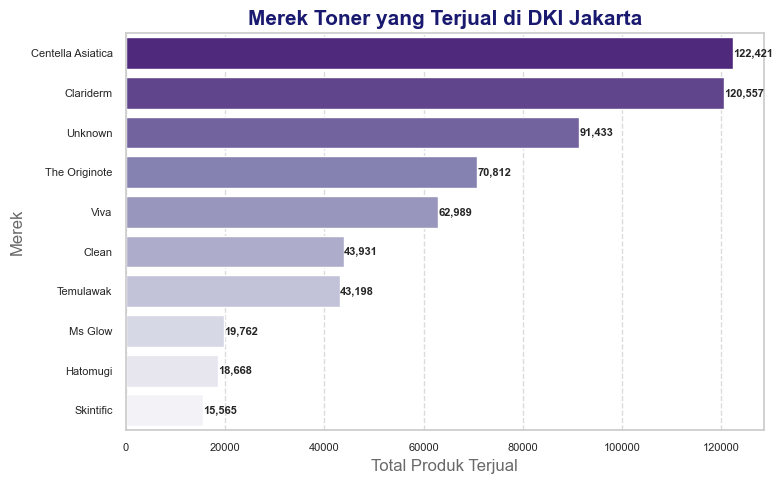

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi DKI Jakarta
jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per merek di DKI Jakarta
merek_jakarta = jakarta_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_jakarta = merek_jakarta.sort_values(by='produkterjual', ascending=False)

# Mengambil top 10 merek termasuk "Unknown"
top_merek = merek_jakarta.head(10)

# Visualisasi
plt.figure(figsize=(8, 5))  # Ukuran figure
# Menggunakan palet ungu terbalik (warna gelap untuk nilai tinggi)
sns.barplot(x='produkterjual', y='merek', data=top_merek, palette='Purples_r')

# Menambahkan anotasi
for index, value in enumerate(top_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek Toner yang Terjual di DKI Jakarta', fontsize=15, weight='bold', color='midnightblue')
plt.xlabel('Total Produk Terjual', fontsize=12, color='dimgray')
plt.ylabel('Merek', fontsize=12, color='dimgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [81]:
unknown_merek_jakarta = df[(df['provinsi'] == 'DKI Jakarta') & (df['merek'] == 'Unknown')]
unknown_jakarta_sorted = unknown_merek_jakarta[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_jakarta = unknown_jakarta_sorted.head(20)
unknown_jakarta

,namaproduk,produkterjual
4927,face mist saffron spray healthy facemist safron,7300
7885,face mist saffron face mist tahan lama mencera...,7100
3973,facemist saffron ara beauty skincare face mist...,5400
6783,perpc toner collagen toner collagen collagen,5100
503,setting spray finishing makeup wajah spray hid...,4600
2388,toner collagen toner wajah collagen,4500
256,rdl surewhite microexfoliant toner rdl nomor m...,4500
328,toner collagen toner collagen vit c whitening,4000
345,sabun pepaya toner kelupas wajah glowing putih...,2700
2872,face toner spray face tone mist in by fleo,2700


#### Distribusi promo di Provinsi DKI Jakarta

Provinsi dengan penjualan terbanyak: DKI Jakarta dengan jumlah produk terjual: 696743


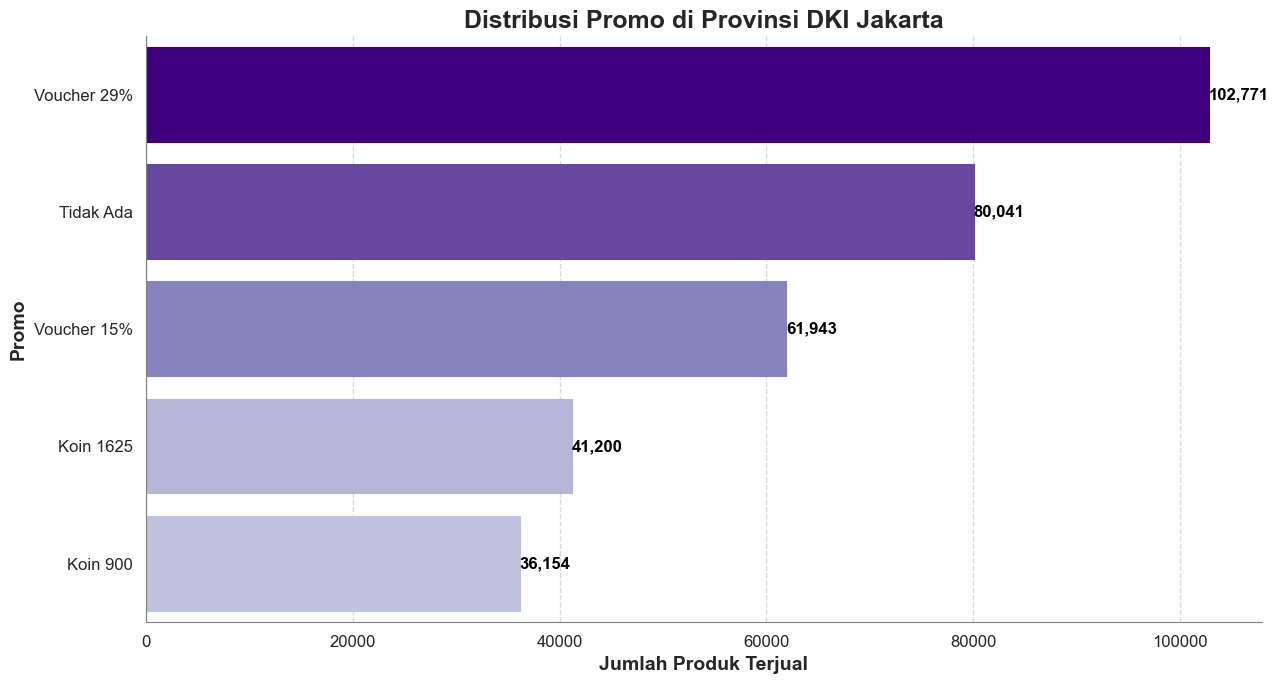

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi DKI Jakarta
top_provinsi = 'DKI Jakarta'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk DKI Jakarta
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan promo di DKI Jakarta
top_5_promo_provinsi = top_provinsi_data.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))
ax = sns.barplot(y=top_5_promo_provinsi.index, x=top_5_promo_provinsi.values, palette='Purples')  # Menggunakan palet ungu

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_promo_provinsi.max()
    color = plt.cm.Purples(color_value)
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi promo di daerah dengan penjualan terbanyak di provinsi DKI Jakarta

Daerah dengan penjualan terbanyak di DKI Jakarta: Kota Jakarta Barat dengan jumlah produk terjual: 328758


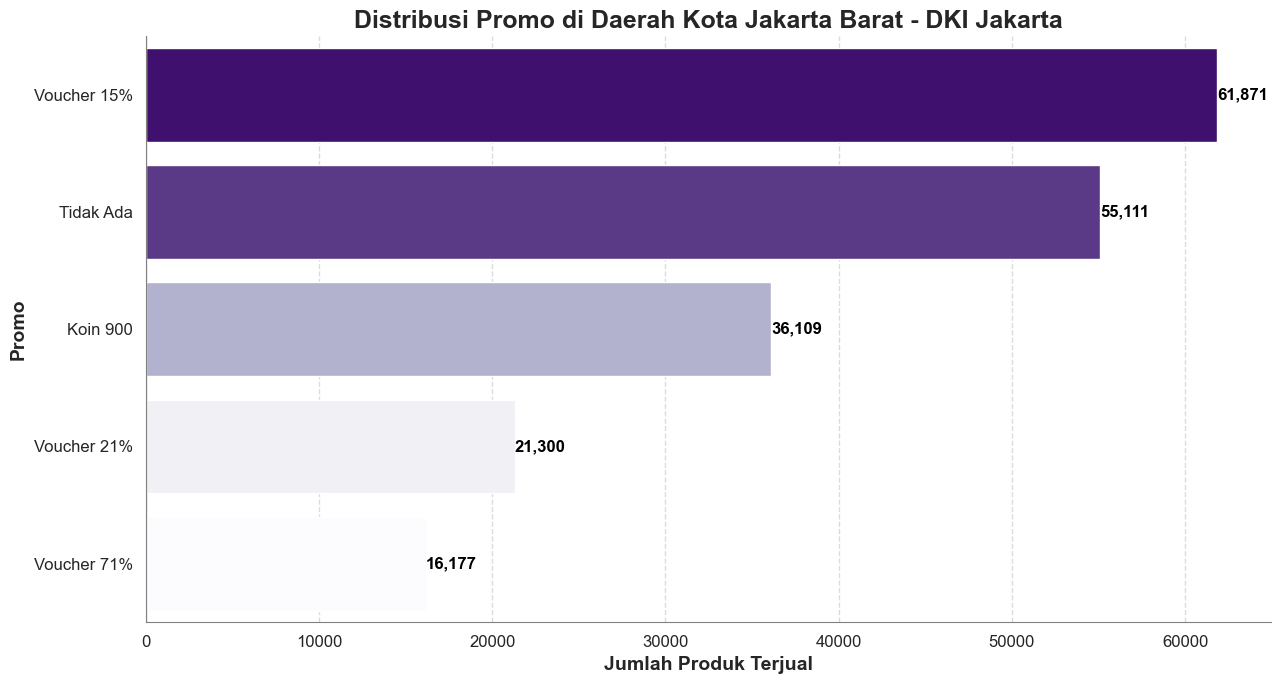

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi DKI Jakarta
jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Total produk terjual per daerah di DKI Jakarta
sales_per_daerah_jakarta = jakarta_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi daerah dengan penjualan terbanyak di DKI Jakarta
top_daerah_jakarta = sales_per_daerah_jakarta.index[0]
top_daerah_sales_jakarta = sales_per_daerah_jakarta.iloc[0]
print(f"Daerah dengan penjualan terbanyak di DKI Jakarta: {top_daerah_jakarta} dengan jumlah produk terjual: {top_daerah_sales_jakarta}")

# Filter data untuk daerah dengan penjualan terbanyak di DKI Jakarta
top_daerah_data_jakarta = jakarta_data[jakarta_data['daerah'] == top_daerah_jakarta]

# Total produk terjual berdasarkan promo di daerah dengan penjualan terbanyak di DKI Jakarta
top_5_promo_jakarta = top_daerah_data_jakarta.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi warna berdasarkan nilai
norm = plt.Normalize(top_5_promo_jakarta.min(), top_5_promo_jakarta.max())
colors = plt.cm.Purples(norm(top_5_promo_jakarta.values))  # Menggunakan palet ungu

# Membuat barplot
ax = sns.barplot(y=top_5_promo_jakarta.index, x=top_5_promo_jakarta.values, palette=colors)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', (width + 5, p.get_y() + p.get_height() / 2.),  # Geser keterangan ke kanan
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Daerah {top_daerah_jakarta} - DKI Jakarta', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi DKI Jakarta

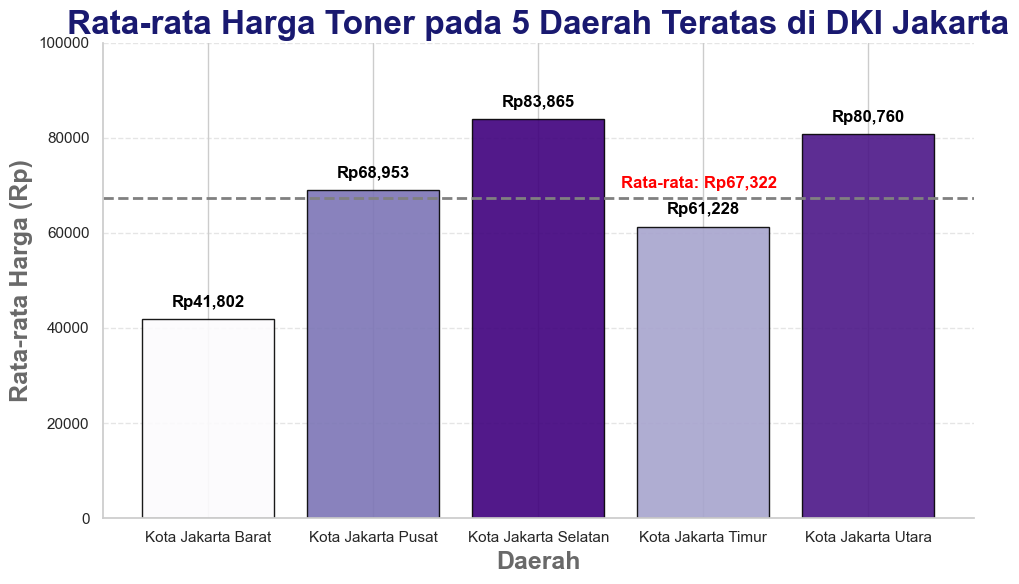

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi Banten
df_banten = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per daerah di Banten
total_terjual_per_daerah = df_banten.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas di Banten berdasarkan produk terjual terbanyak
top_5_daerah_banten = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas di Banten
df_top_5_daerah_banten = df_banten[df_banten['daerah'].isin(top_5_daerah_banten['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_banten = df_top_5_daerah_banten.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_banten = avg_harga_top_5_banten.merge(top_5_daerah_banten, on='daerah')

# Membuat gradien warna berdasarkan harga (ungu)
norm = plt.Normalize(avg_harga_top_5_banten['harga'].min(), avg_harga_top_5_banten['harga'].max())
colors = plt.cm.Purples(norm(avg_harga_top_5_banten['harga']))  # Menggunakan palet ungu

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Grafik: Rata-rata Harga di Top 5 Daerah di Banten
barplot = plt.bar(avg_harga_top_5_banten['daerah'], avg_harga_top_5_banten['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga Toner pada 5 Daerah Teratas di DKI Jakarta', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=18, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=18, weight='bold', color='dimgray')

# Mengatur batas sumbu Y
plt.ylim(0, 100000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 100001, 20000))  # Set interval setiap 20.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_banten['harga'].mean()
plt.axhline(mean_value, color='grey', linestyle='--', linewidth=2)
plt.text(2.5, mean_value + 2000, f'Rata-rata: Rp{mean_value:,.0f}', color='red', fontsize=12, fontweight='bold')

# Mengatur gaya grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menghilangkan spines untuk tampilan yang lebih bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')  # Menghilangkan latar belakang

# Menampilkan plot
plt.tight_layout()
plt.show()

## Membuat kolom baru 'cashbackkoin' dan 'voucher' dari data kategori promo

In [85]:
# Fungsi untuk mengambil nilai koin dari kolom promo
def extract_cashback_koin(promo):
    match = re.search(r'Koin (\d+)', promo)  # Cari pola 'Koin XXX' dengan angka
    if match:
        return int(match.group(1))  # Jika cocok, kembalikan angka
    return 0  # Jika tidak ada 'Koin XXX', kembalikan 0

# Fungsi untuk mengambil nilai voucher dari kolom promo
def extract_voucher(promo):
    match = re.search(r'Voucher (\d+)%', promo)  # Cari pola 'Voucher XX%' dengan angka
    if match:
        return int(match.group(1))  # Jika cocok, kembalikan angka
    return 0  
df['cashbackkoin'] = df['promo'].apply(extract_cashback_koin)
df['voucher(%)'] = df['promo'].apply(extract_voucher)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3958378758.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cashbackkoin'] = df['promo'].apply(extract_cashback_koin)
C:\Users\hp\AppData\Local\Temp\ipykernel_33864\3958378758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voucher(%)'] = df['promo'].apply(extract_voucher)


,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi,merek,cashbackkoin,voucher(%)
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...,DKI Jakarta,Natura,0,0
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown,210,0
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown,0,0
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar value product,Jawa Barat,Viva,0,0
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown,600,0


In [86]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk tokenisasi dan stemming pada kolom namaproduk
def tokenize_and_stem(text):
    # Tokenisasi: Memecah kalimat menjadi kata-kata (tokens)
    tokens = text.split()
    
    # Melakukan stemming pada setiap token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Menggabungkan kembali token yang sudah di-stemming menjadi kalimat
    return ' '.join(stemmed_tokens)

# Terapkan tokenisasi dan stemming ke kolom 'namaproduk'
df['namaproduk'] = df['namaproduk'].apply(tokenize_and_stem)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_33864\819080499.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['namaproduk'] = df['namaproduk'].apply(tokenize_and_stem)


,linkproduk,harga,produkterjual,jumlahpenilaian,promo,daerah,namaproduk,provinsi,merek,cashbackkoin,voucher(%)
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,768,Tidak Ada,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...,DKI Jakarta,Natura,0,0
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,1074,Koin 210,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown,210,0
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,44,Tidak Ada,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown,0,0
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,731,Tidak Ada,Kab. Bekasi,viva air mawar value product,Jawa Barat,Viva,0,0
4,https://www.lazada.co.id/products/toner-collag...,12000,297,47,Koin 600,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown,600,0


In [87]:
# Menghapus baris di mana nilai pada kolom 'produkterjual' adalah 0
df = df[df['produkterjual'] >= 50]
df = df.drop(columns=['jumlahpenilaian', 'promo'])
df.head()

,linkproduk,harga,produkterjual,daerah,namaproduk,provinsi,merek,cashbackkoin,voucher(%)
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...,DKI Jakarta,Natura,0,0
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown,210,0
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown,0,0
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,Kab. Bekasi,viva air mawar value product,Jawa Barat,Viva,0,0
4,https://www.lazada.co.id/products/toner-collag...,12000,297,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown,600,0


## Menyimpan data

In [88]:
df.to_csv(r'C:\Users\hp\Downloads\TonerCleanData.csv', index=False)
print("File telah berhasil disimpan ke folder Downloads dengan nama 'TonerCleanData.csv'.")

File telah berhasil disimpan ke folder Downloads dengan nama 'TonerCleanData.csv'.
